In [1]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist
import copy
import os
import sys

In [2]:
currentpath=os.getcwd()
basepath=currentpath.split("/")
basepath="/".join(basepath[0:basepath.index("test")+1])+"/data/ryukyu4/{}"

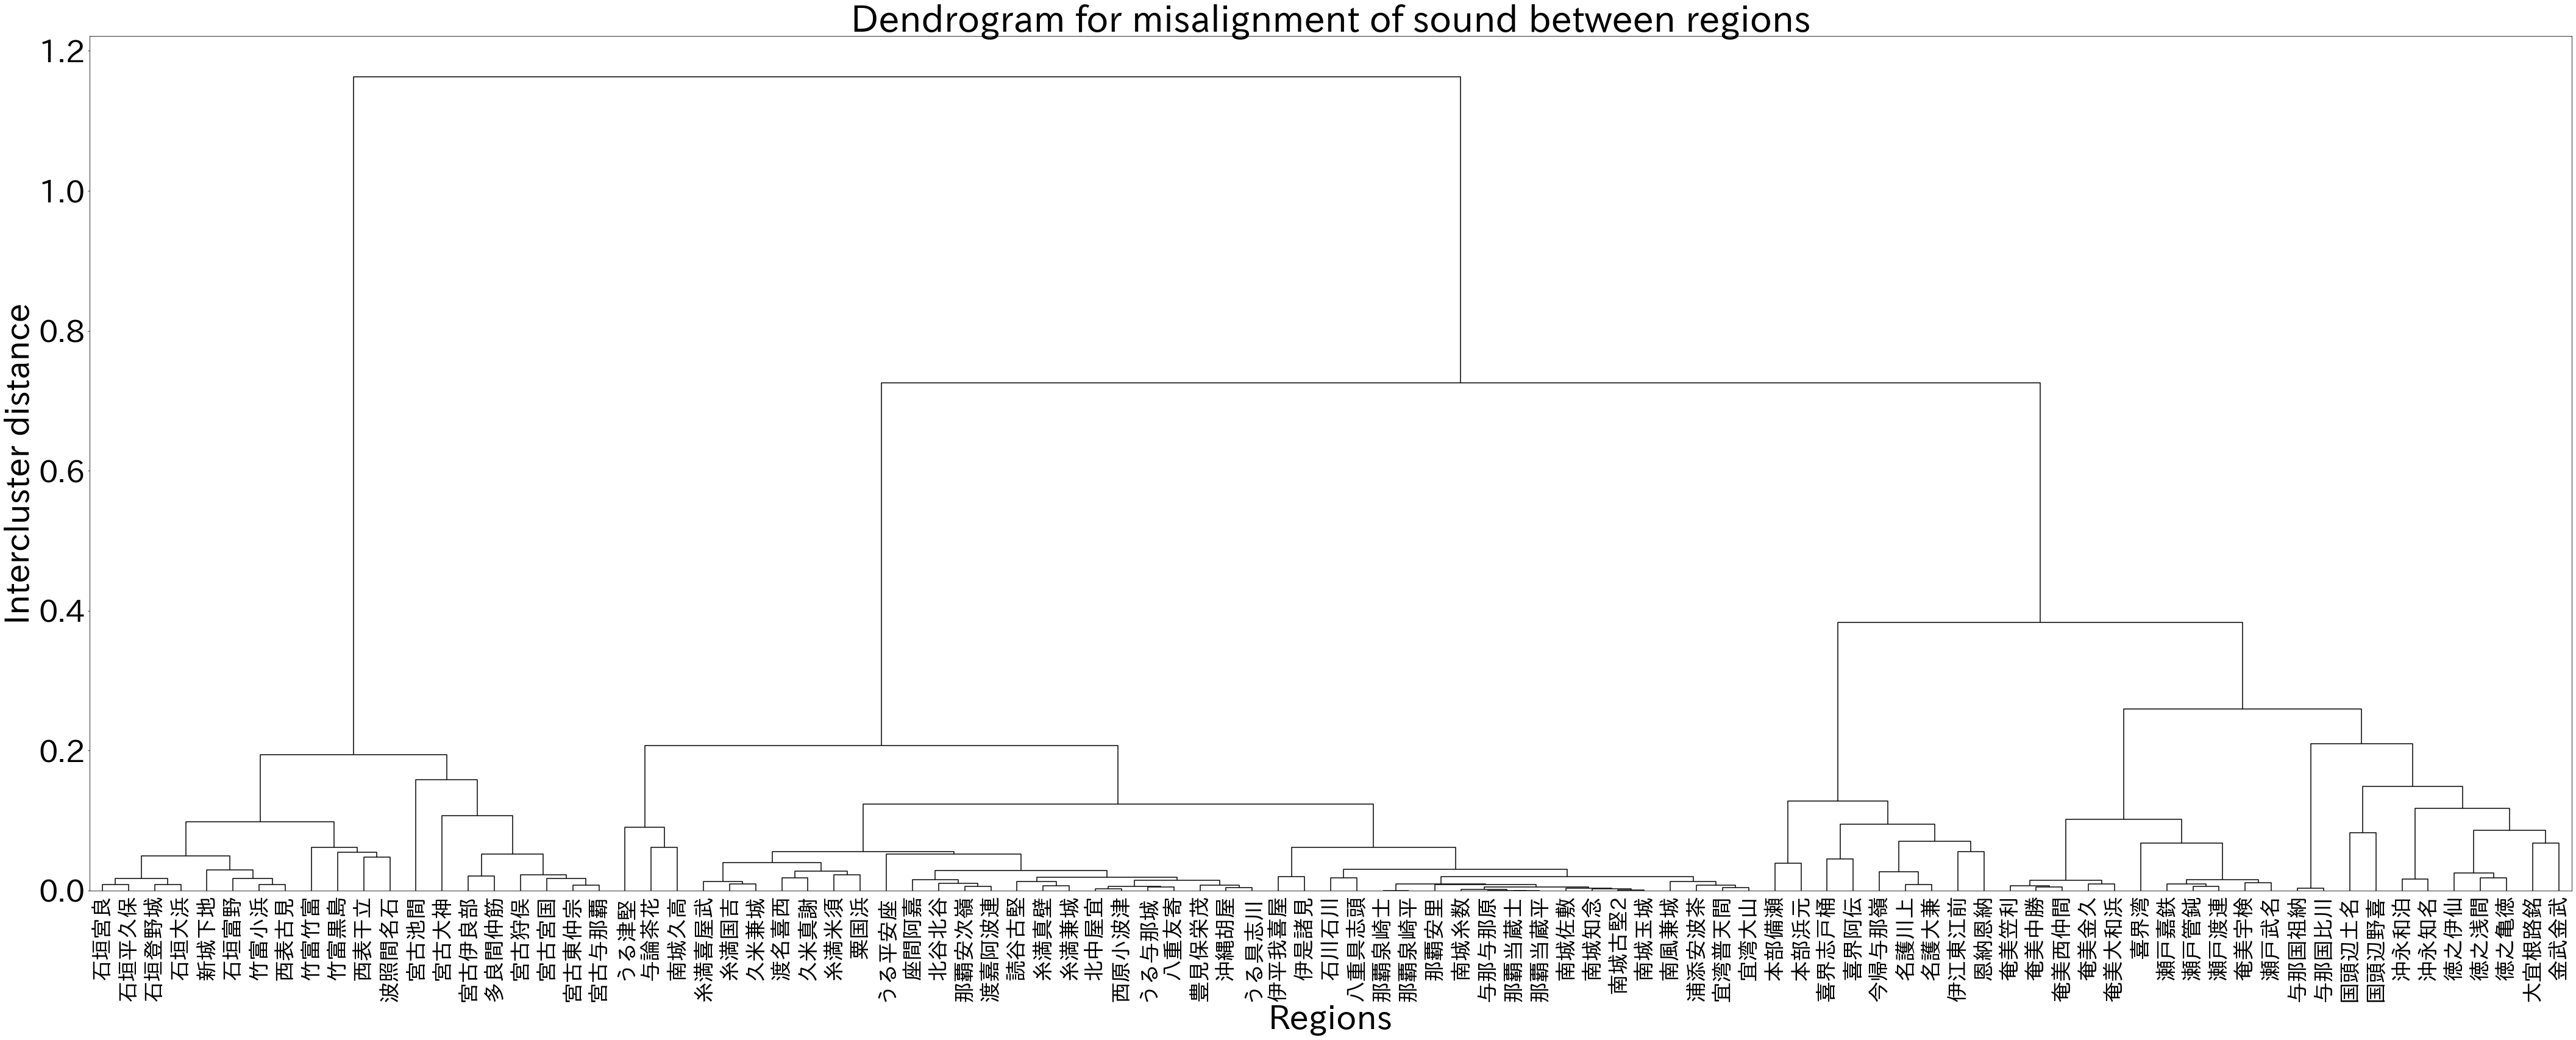

/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:78: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/qvel/.pyenv/versions/anaconda3-5.3.1/envs/language/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


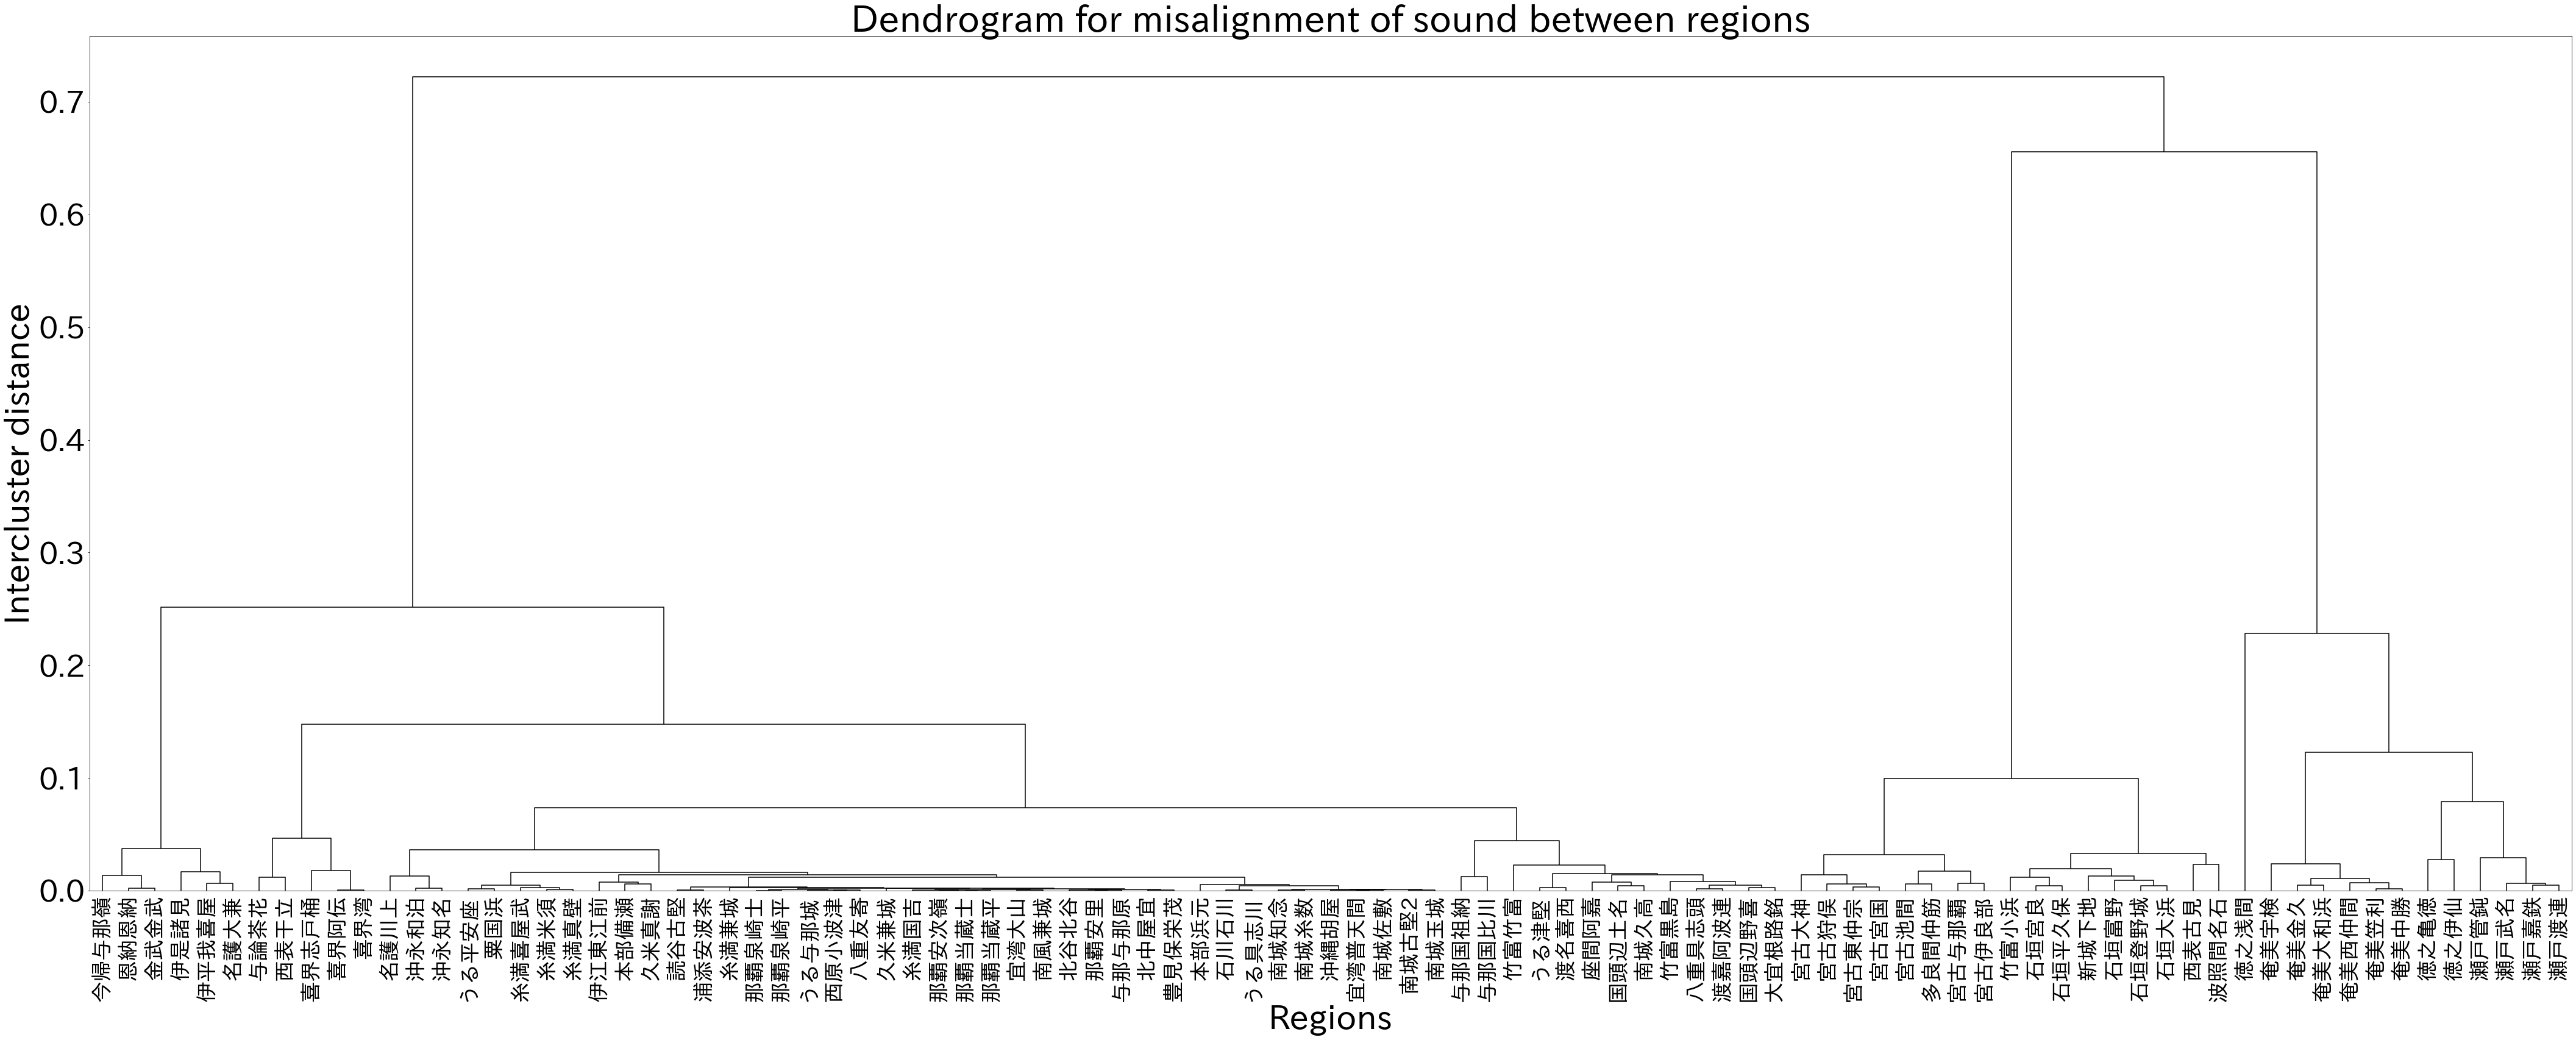

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 1, 5, 5, 3, 3]


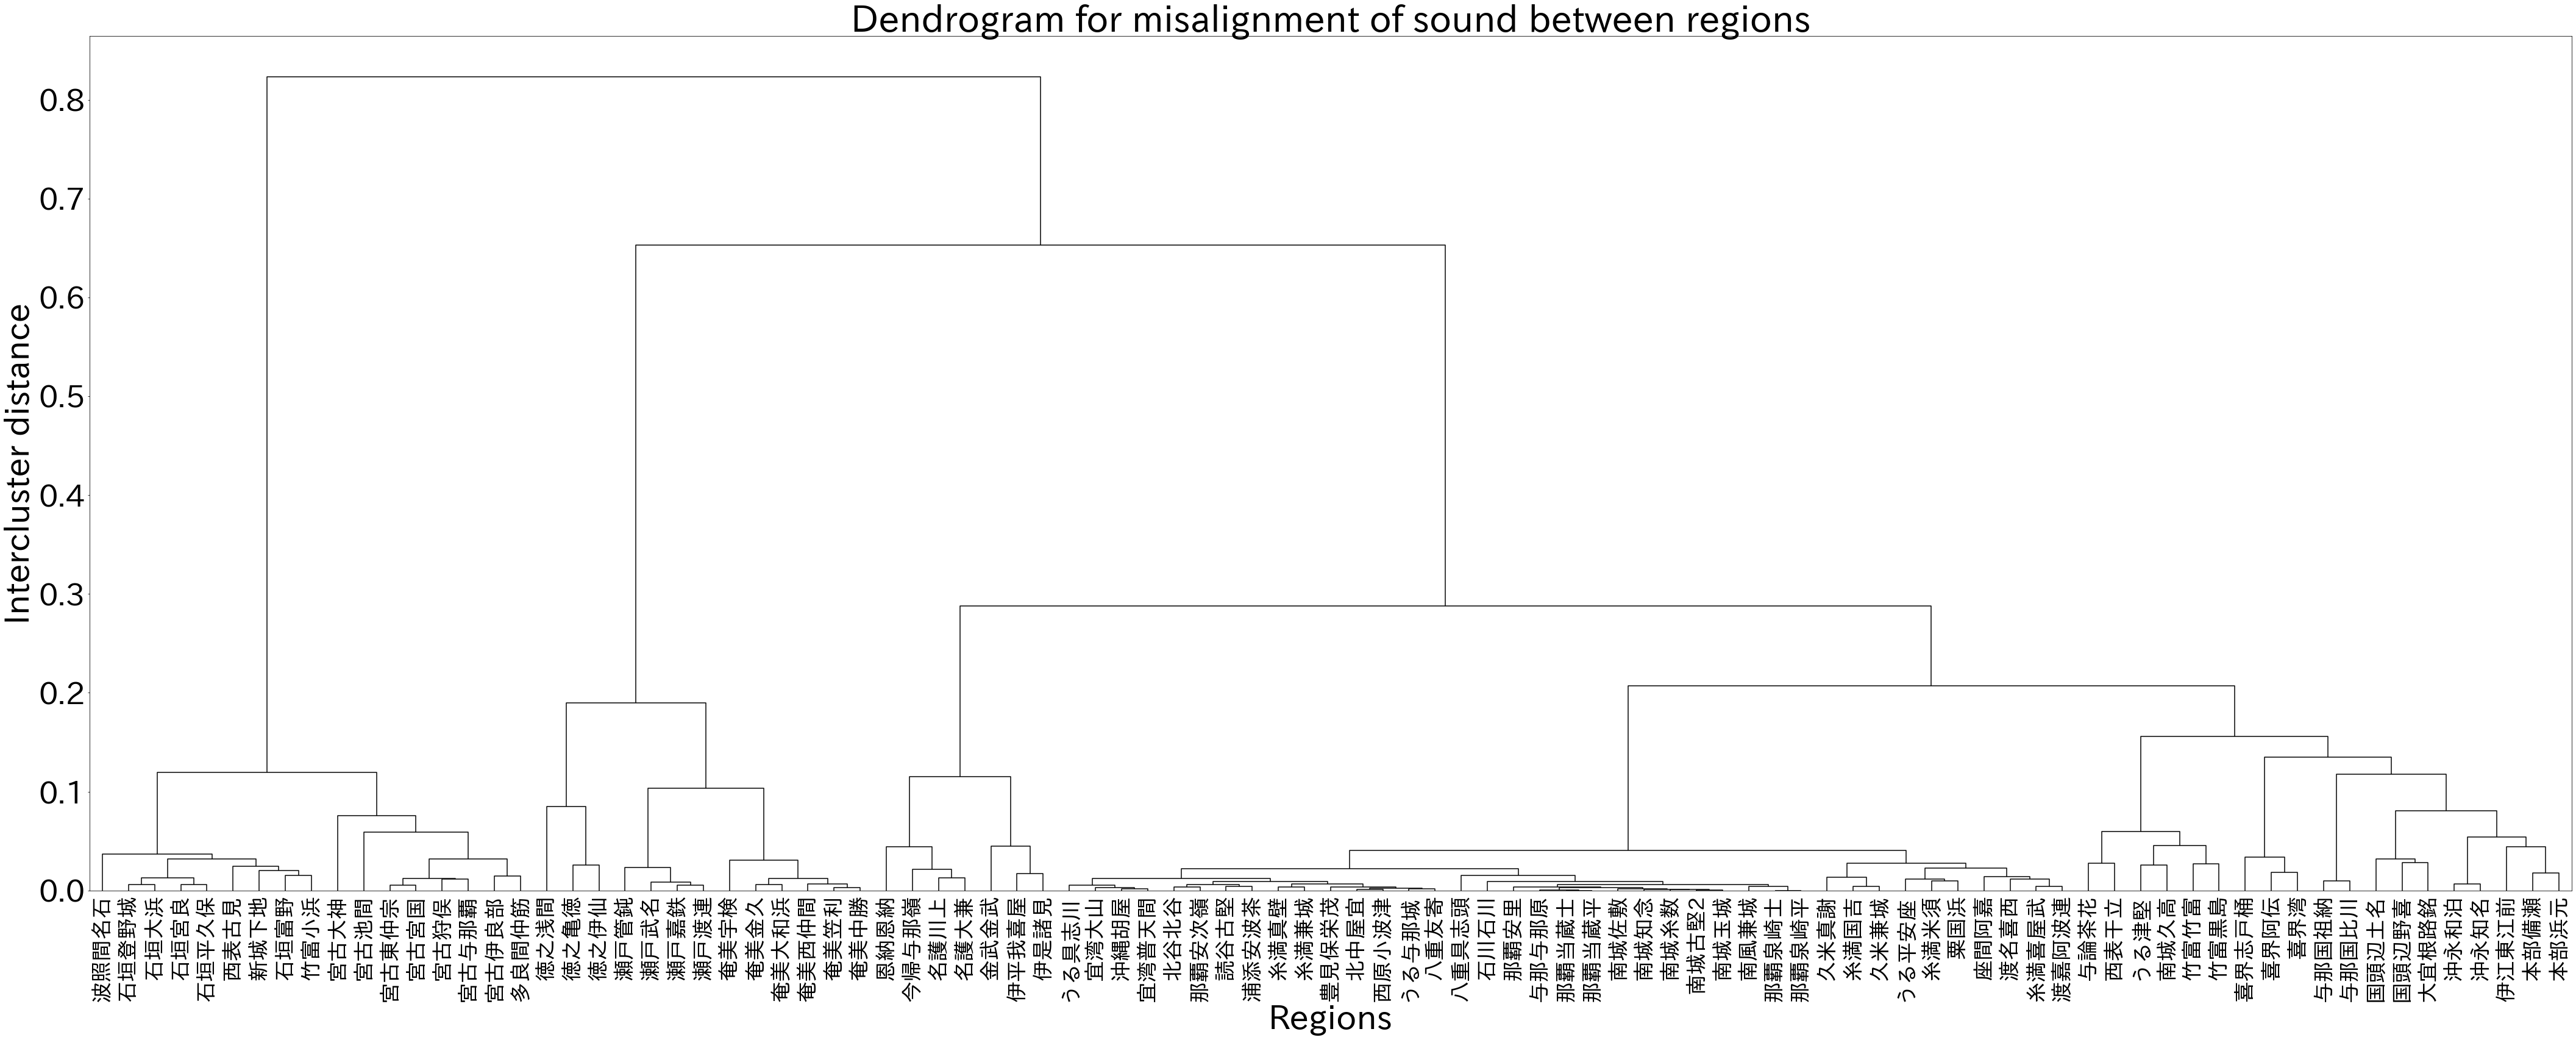

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1]


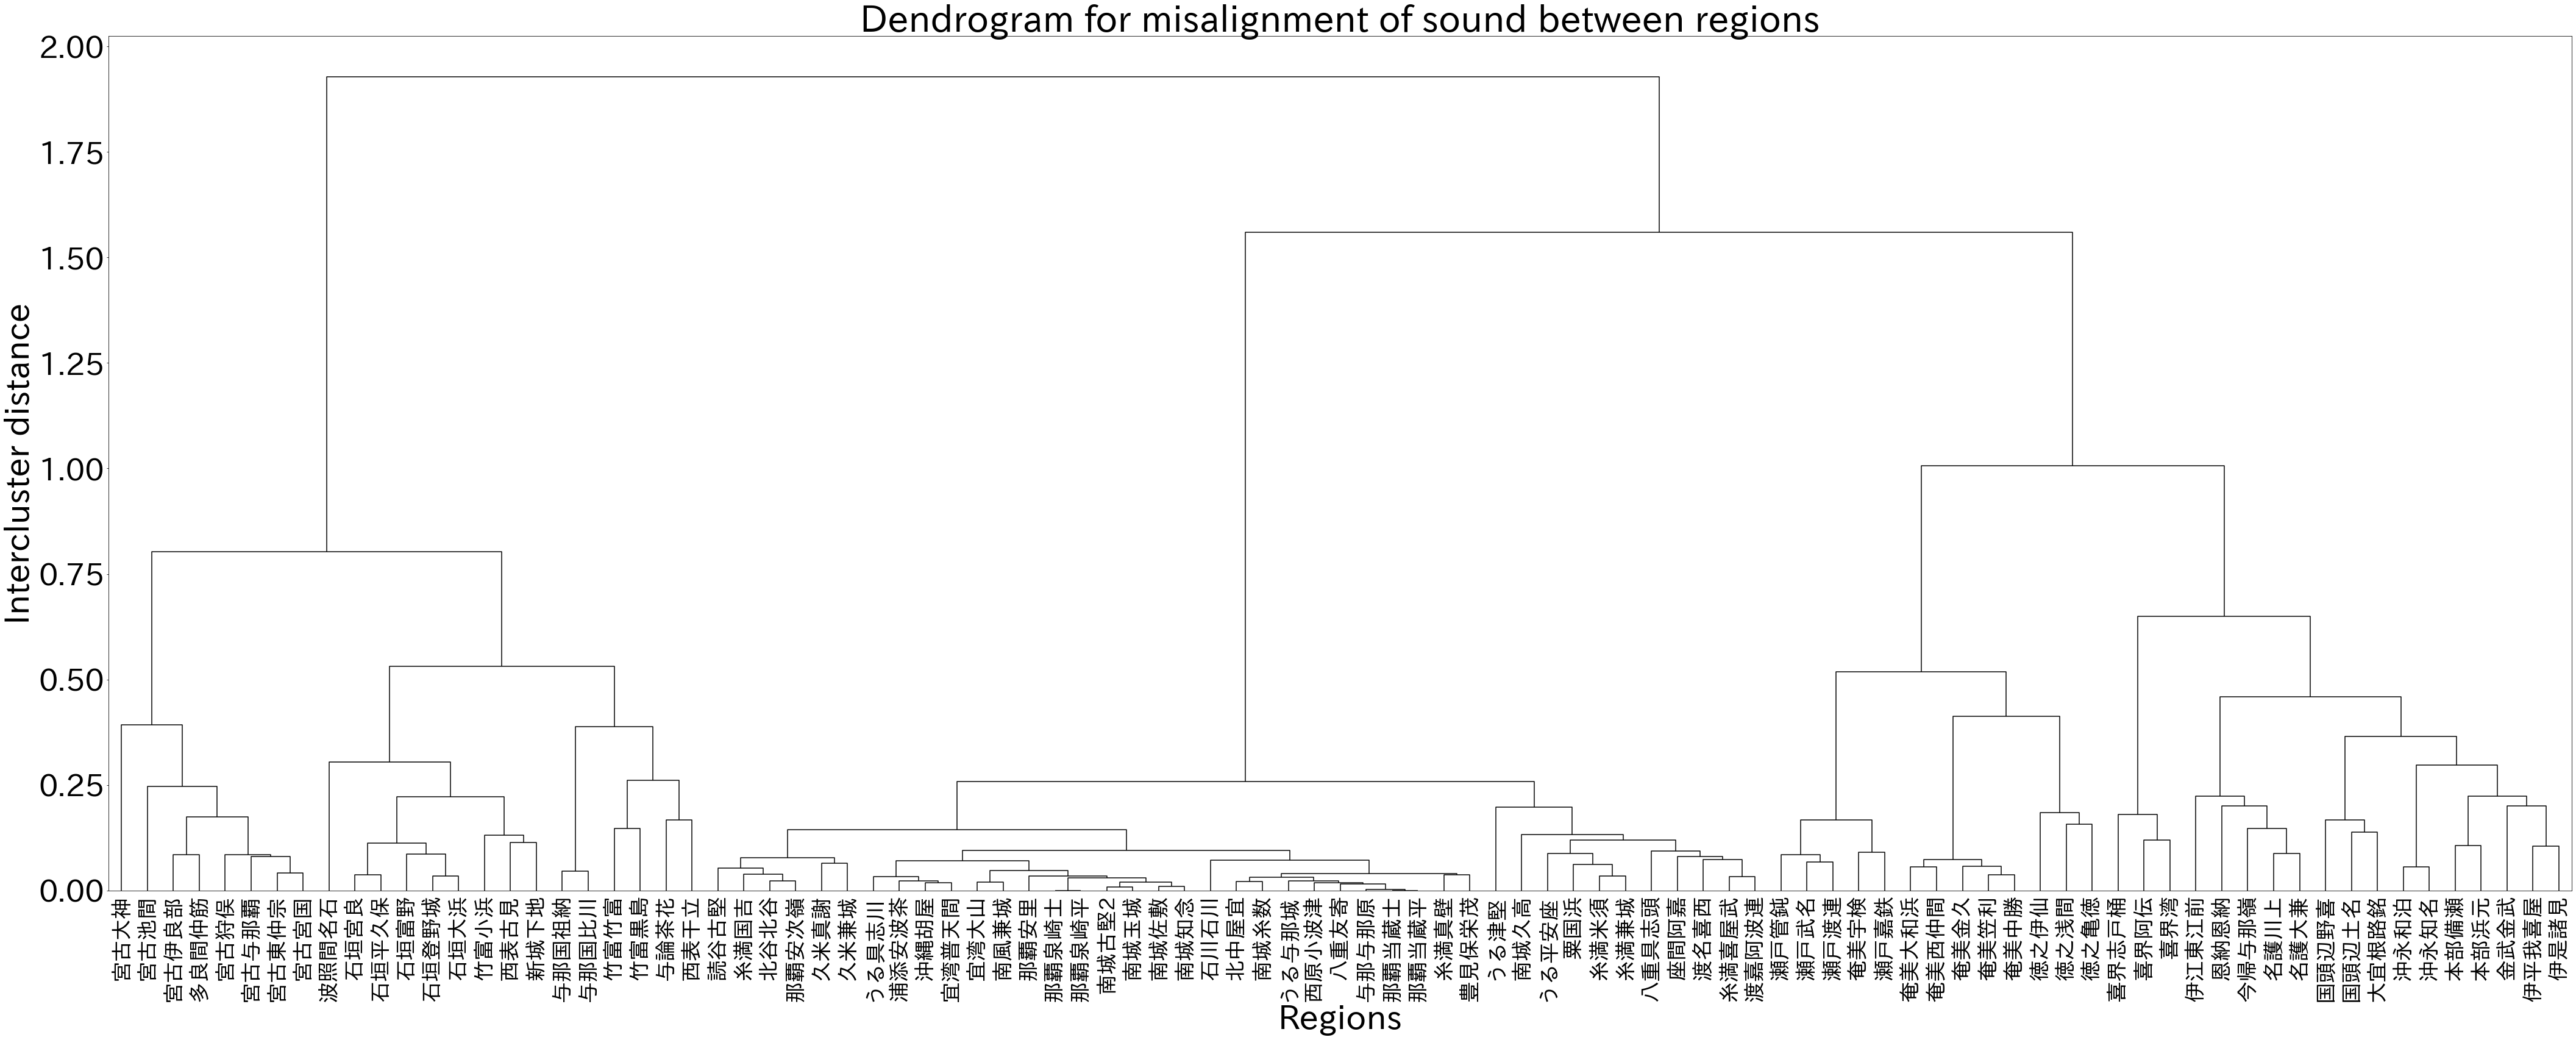

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


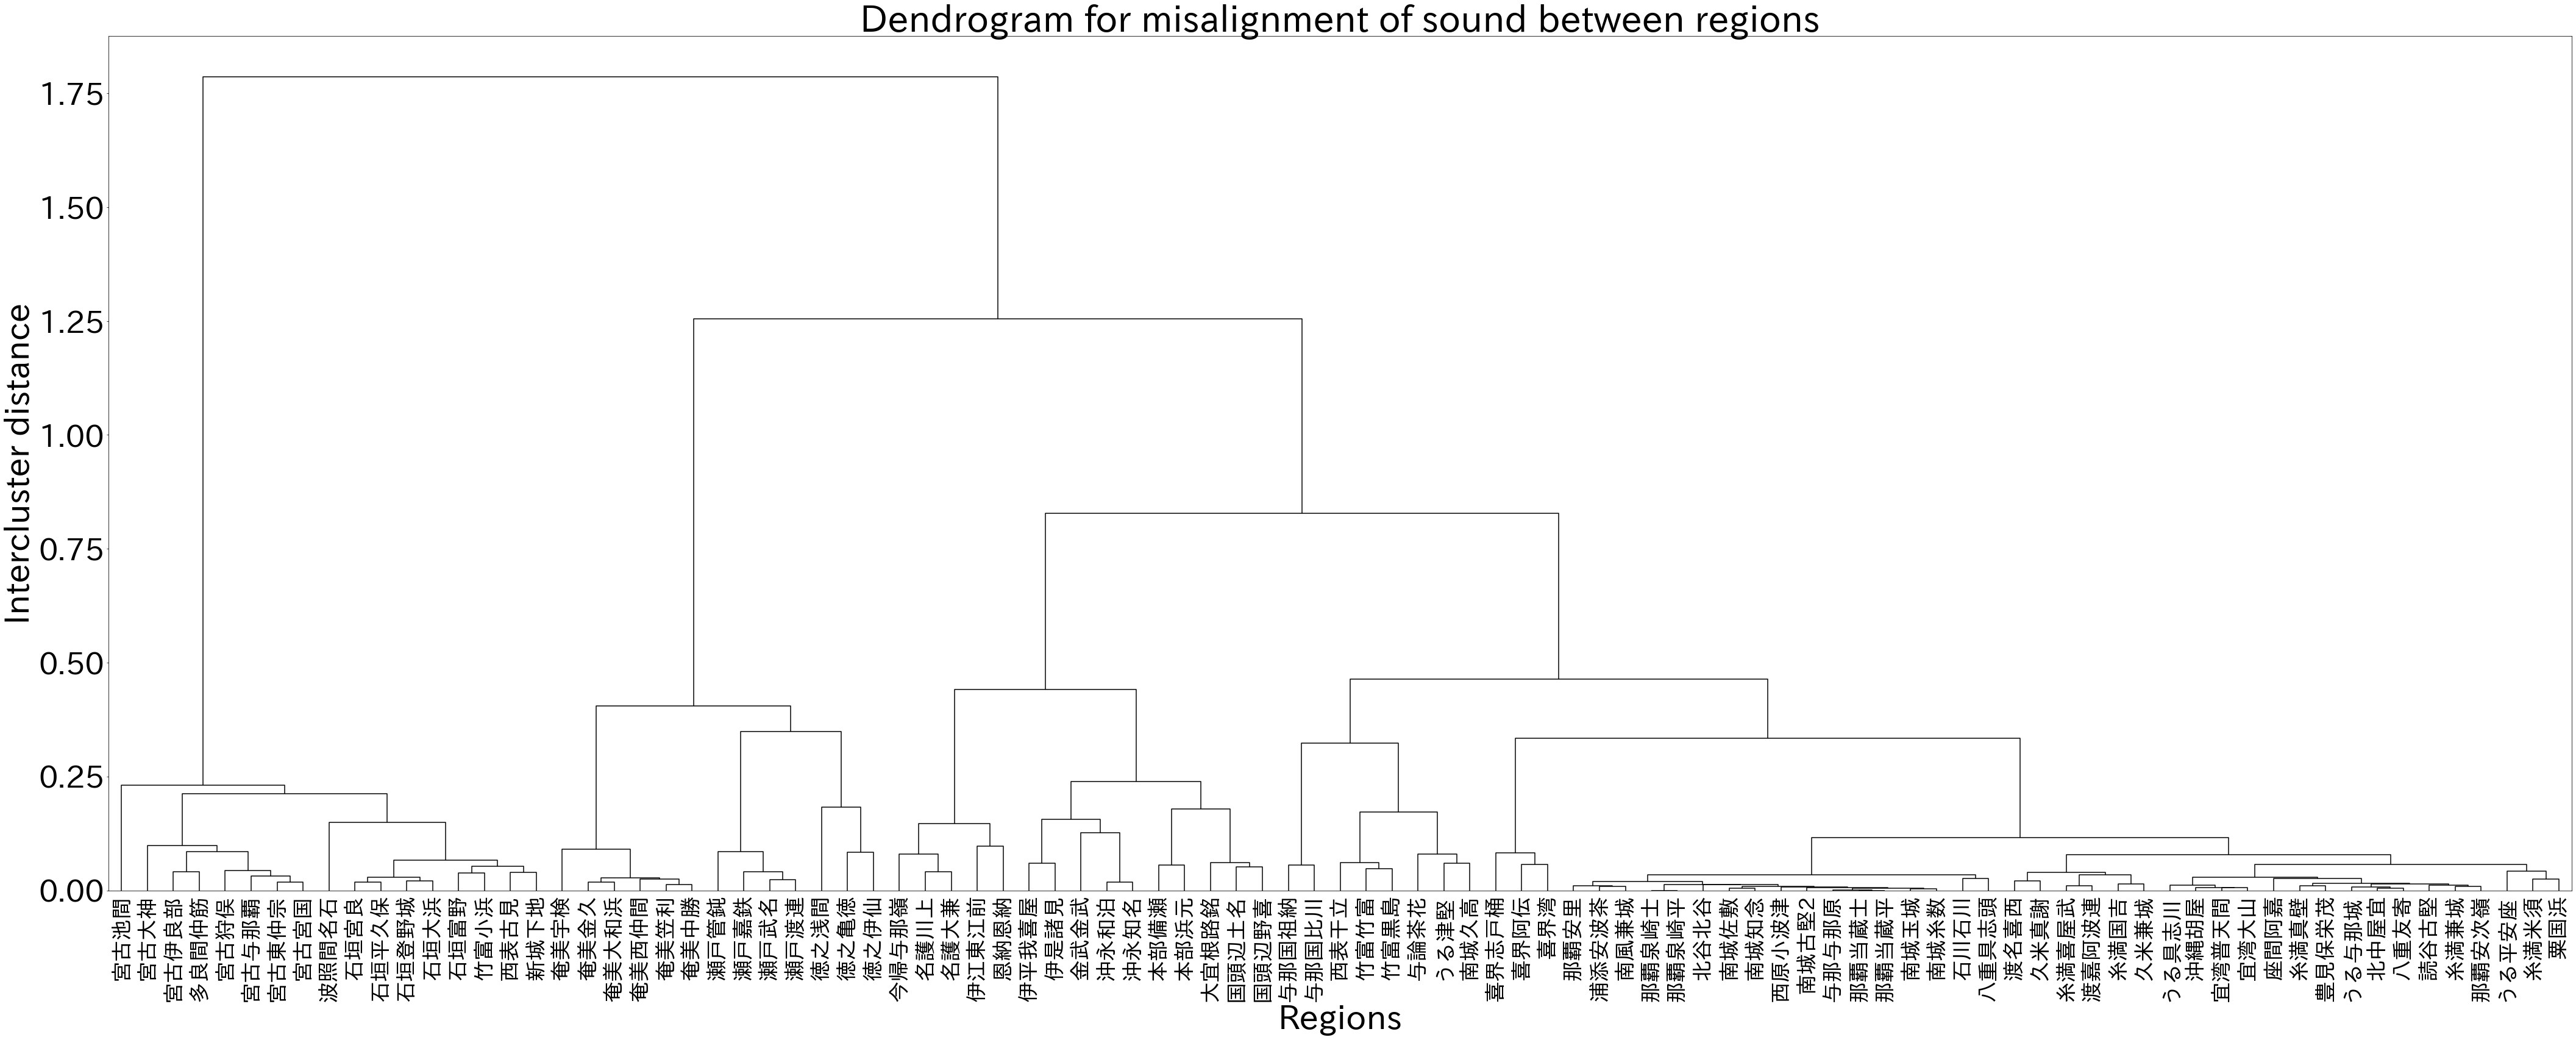

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 3, 5, 5, 3, 3]


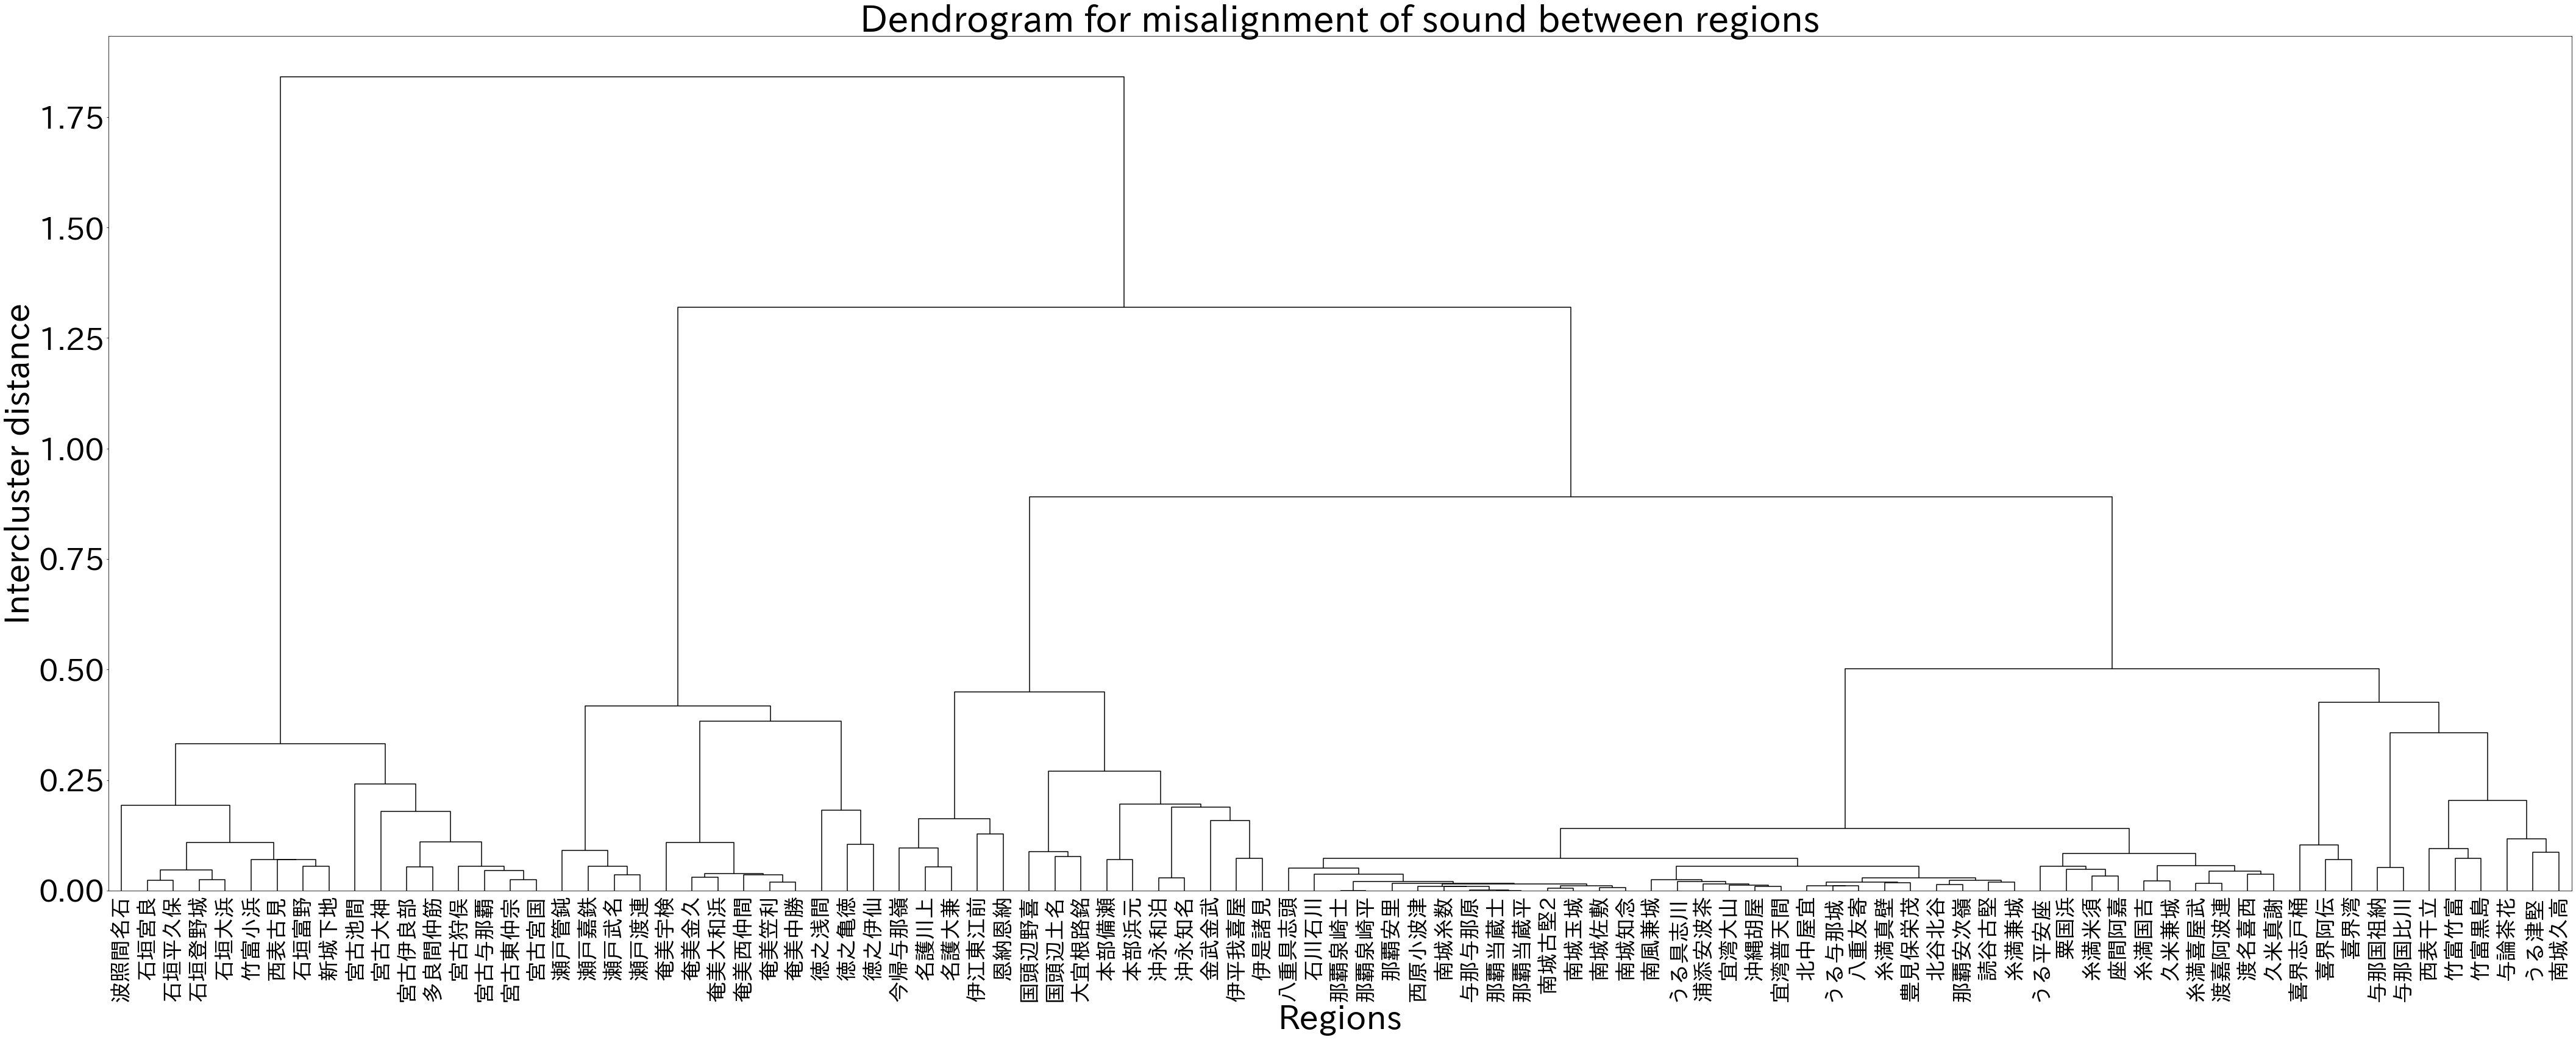

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1]


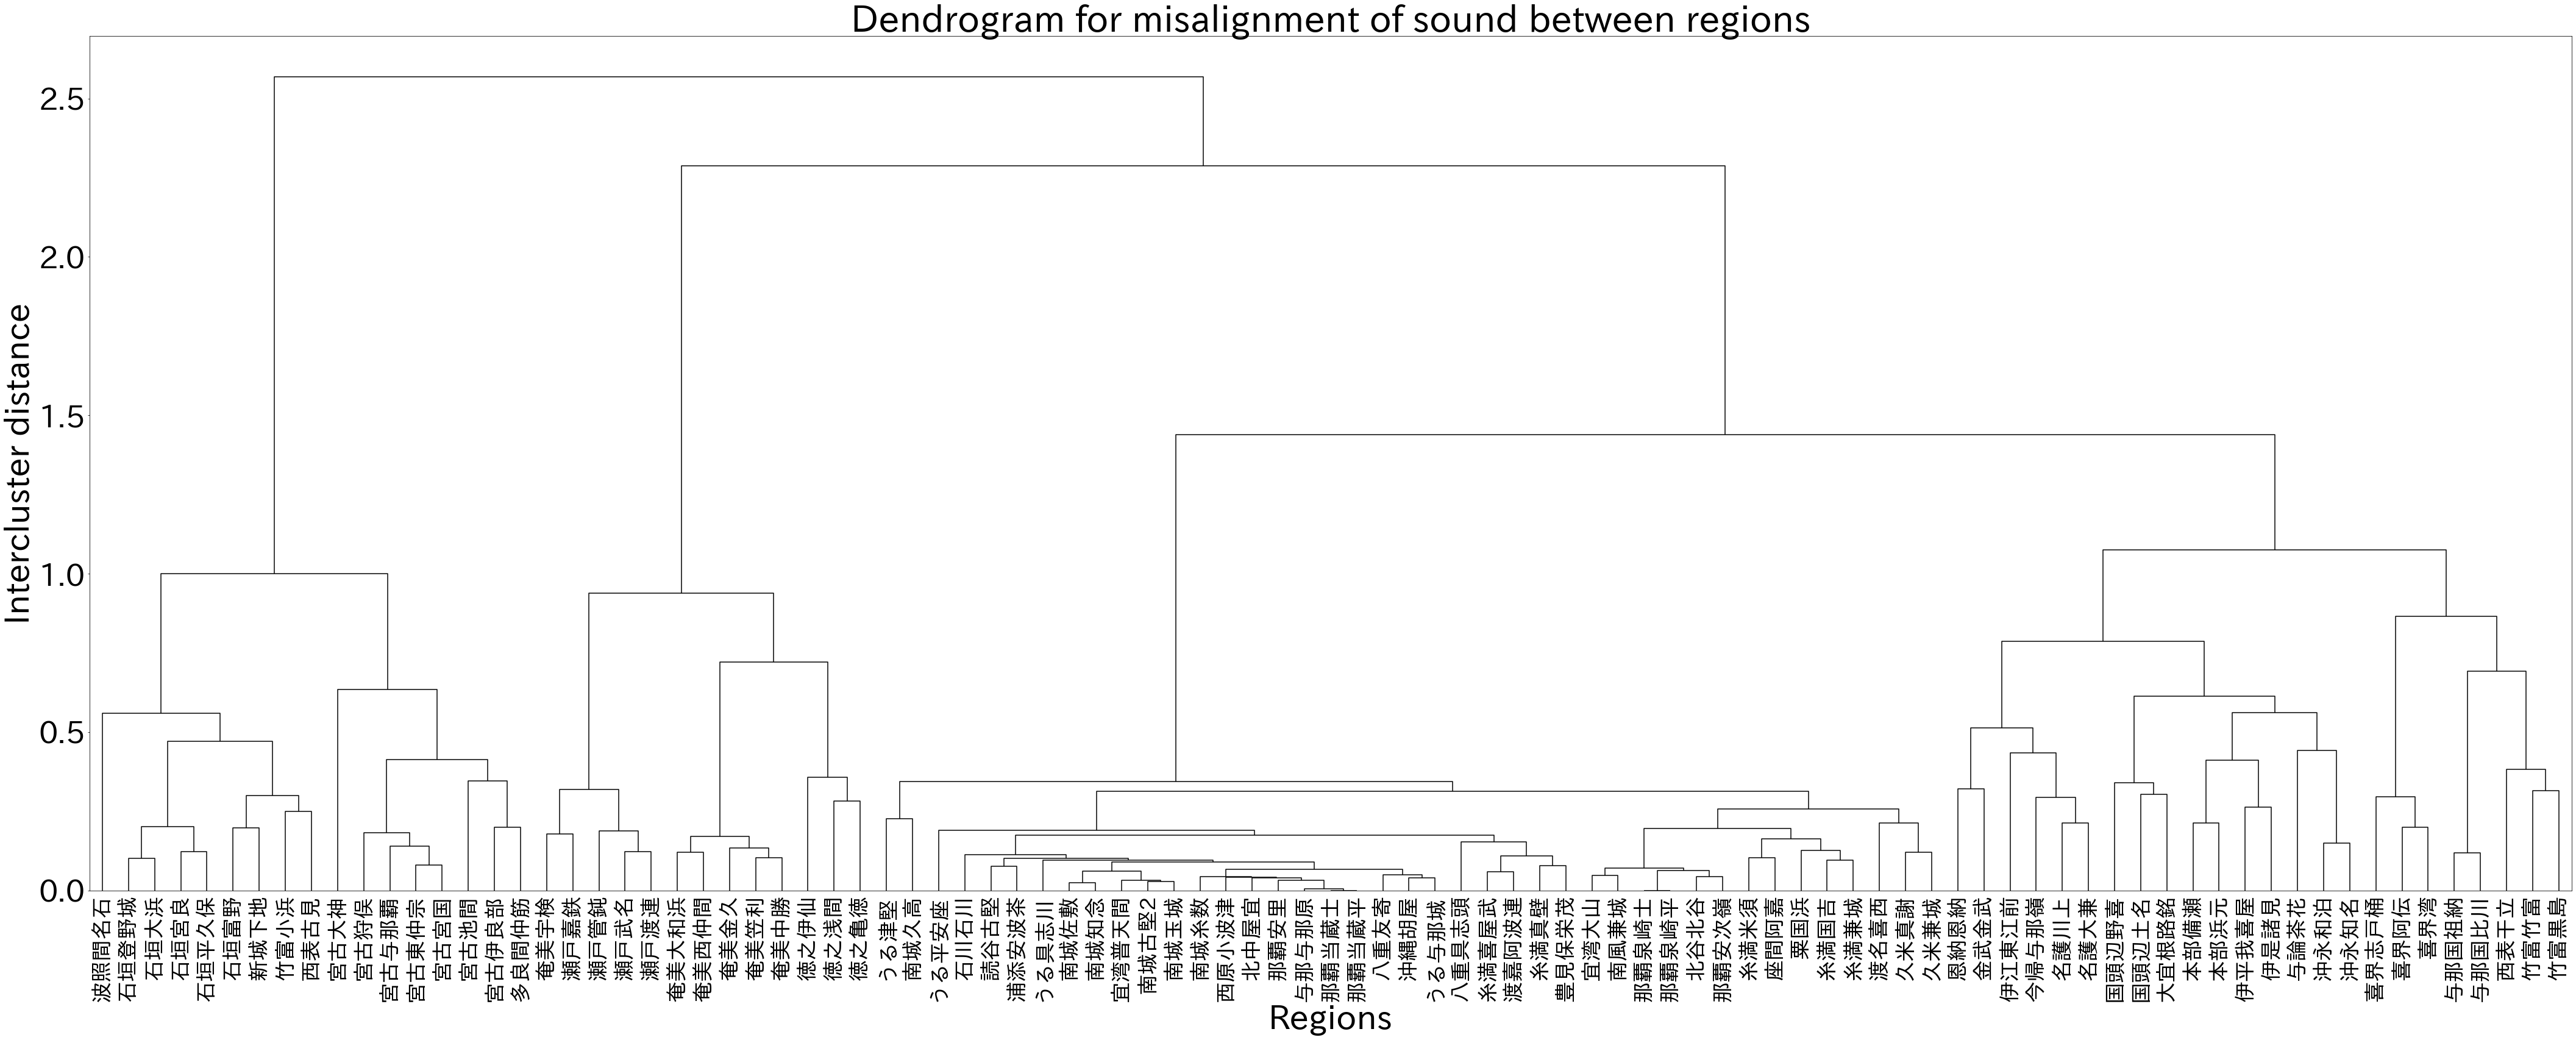

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1]


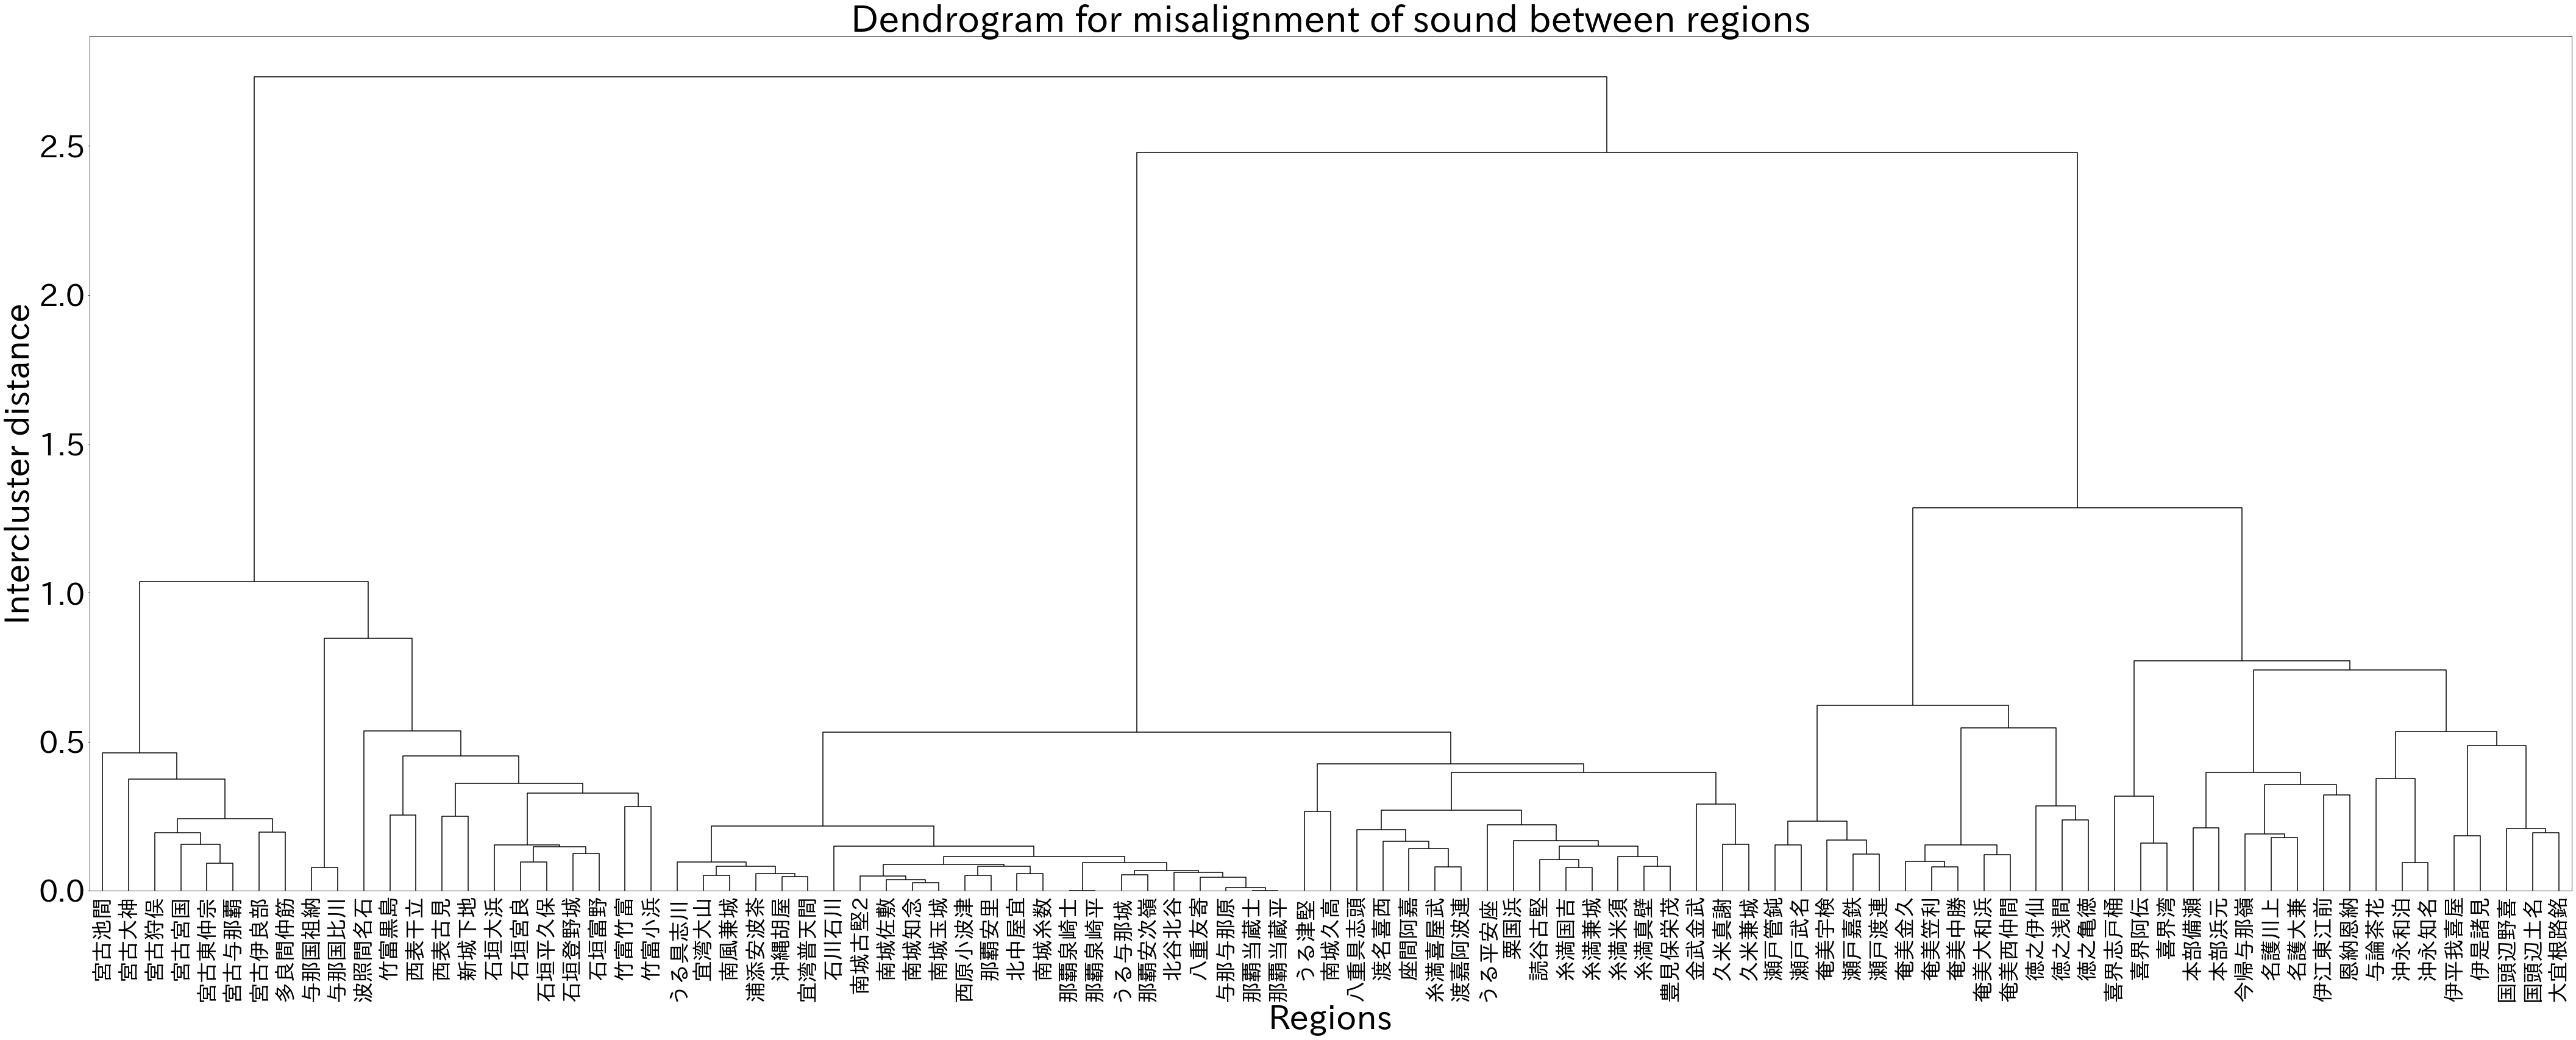

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


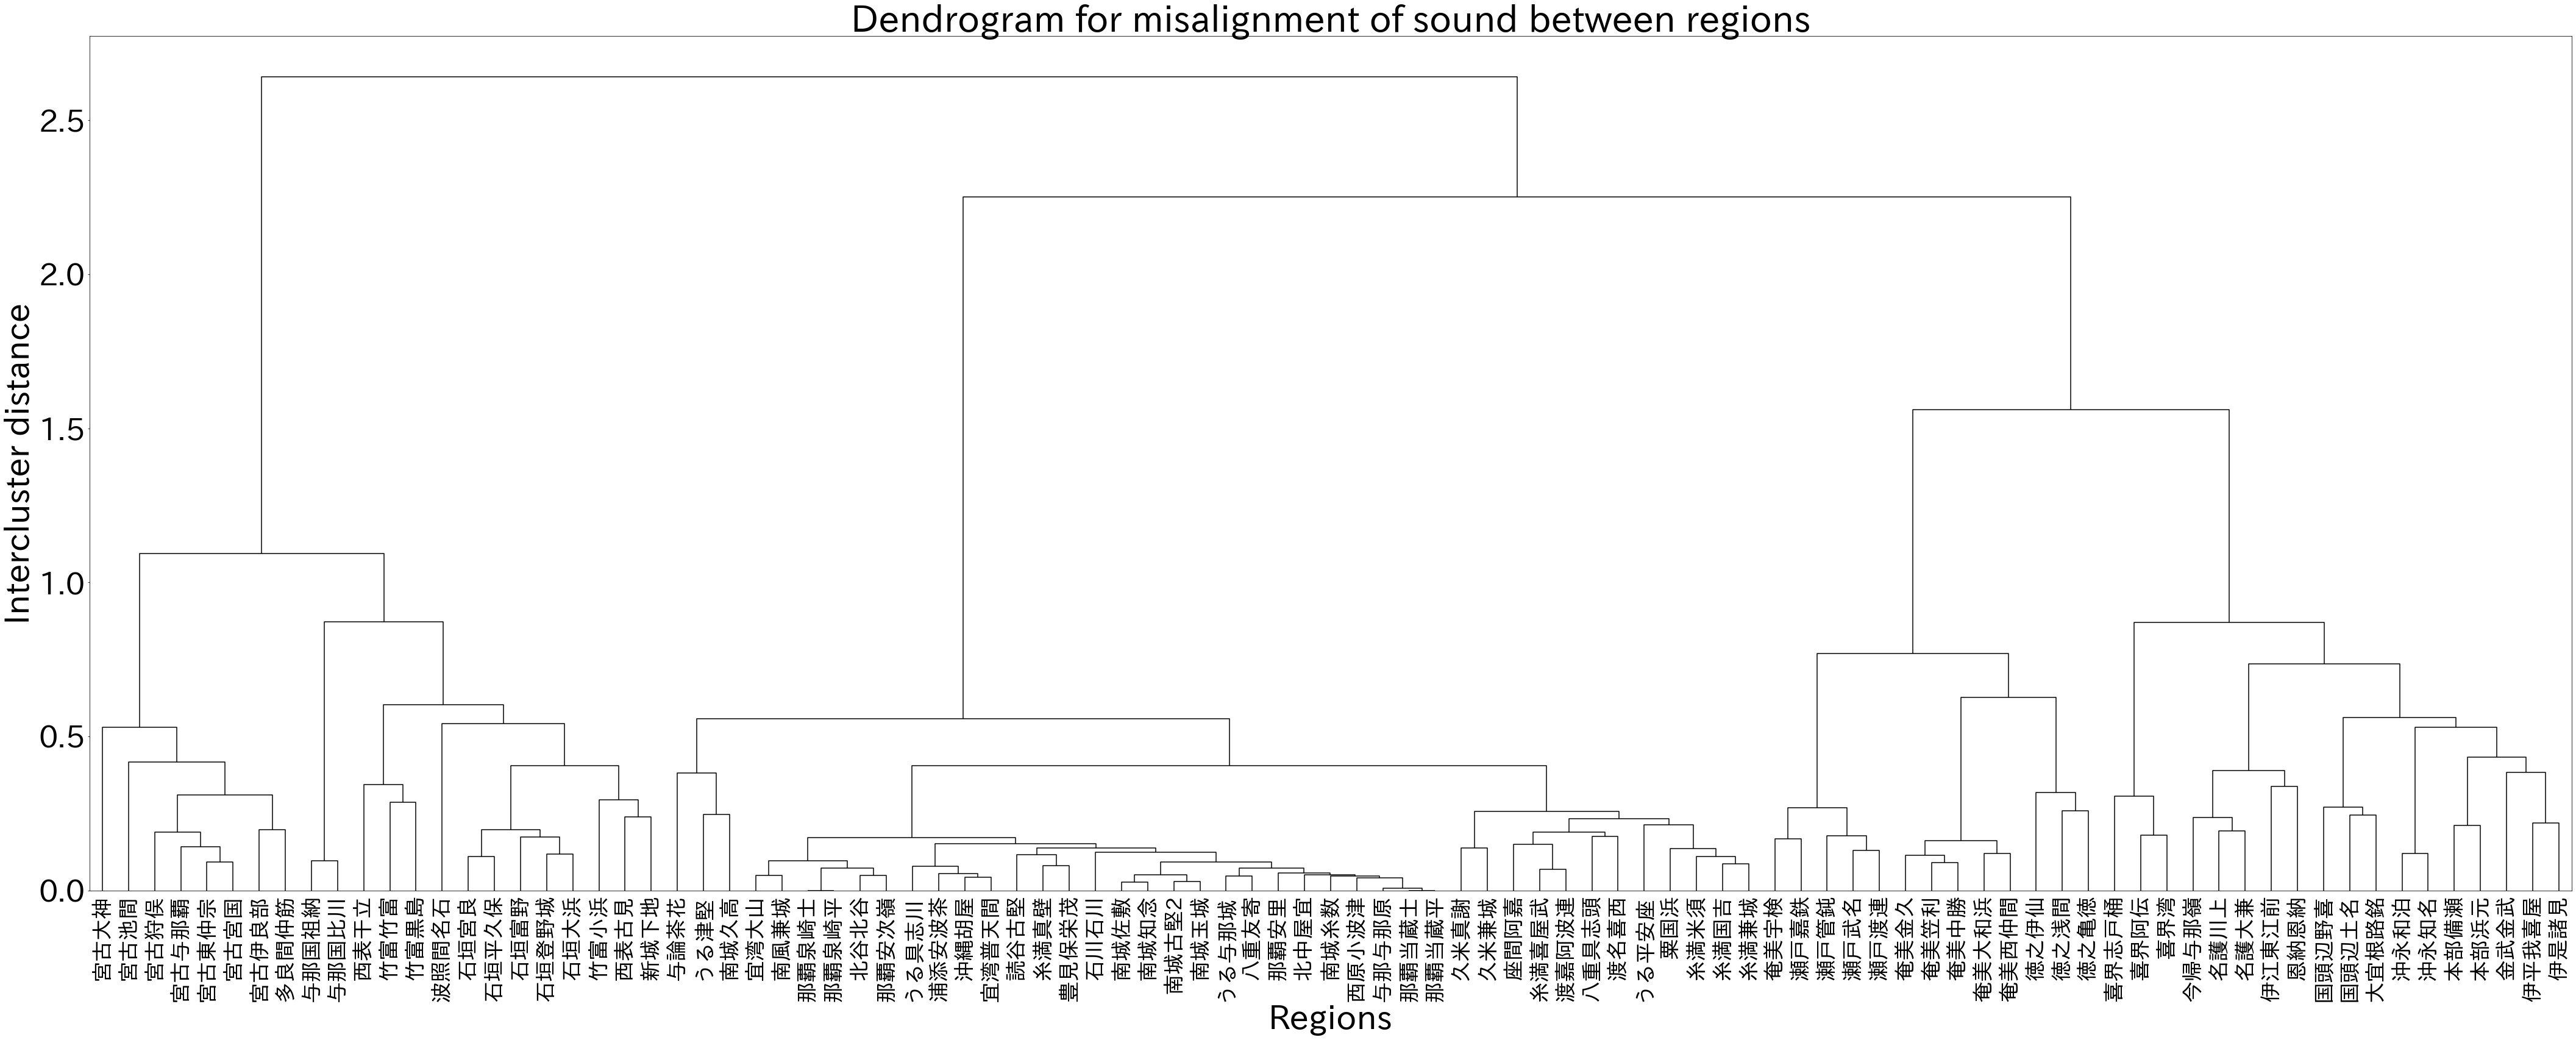

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


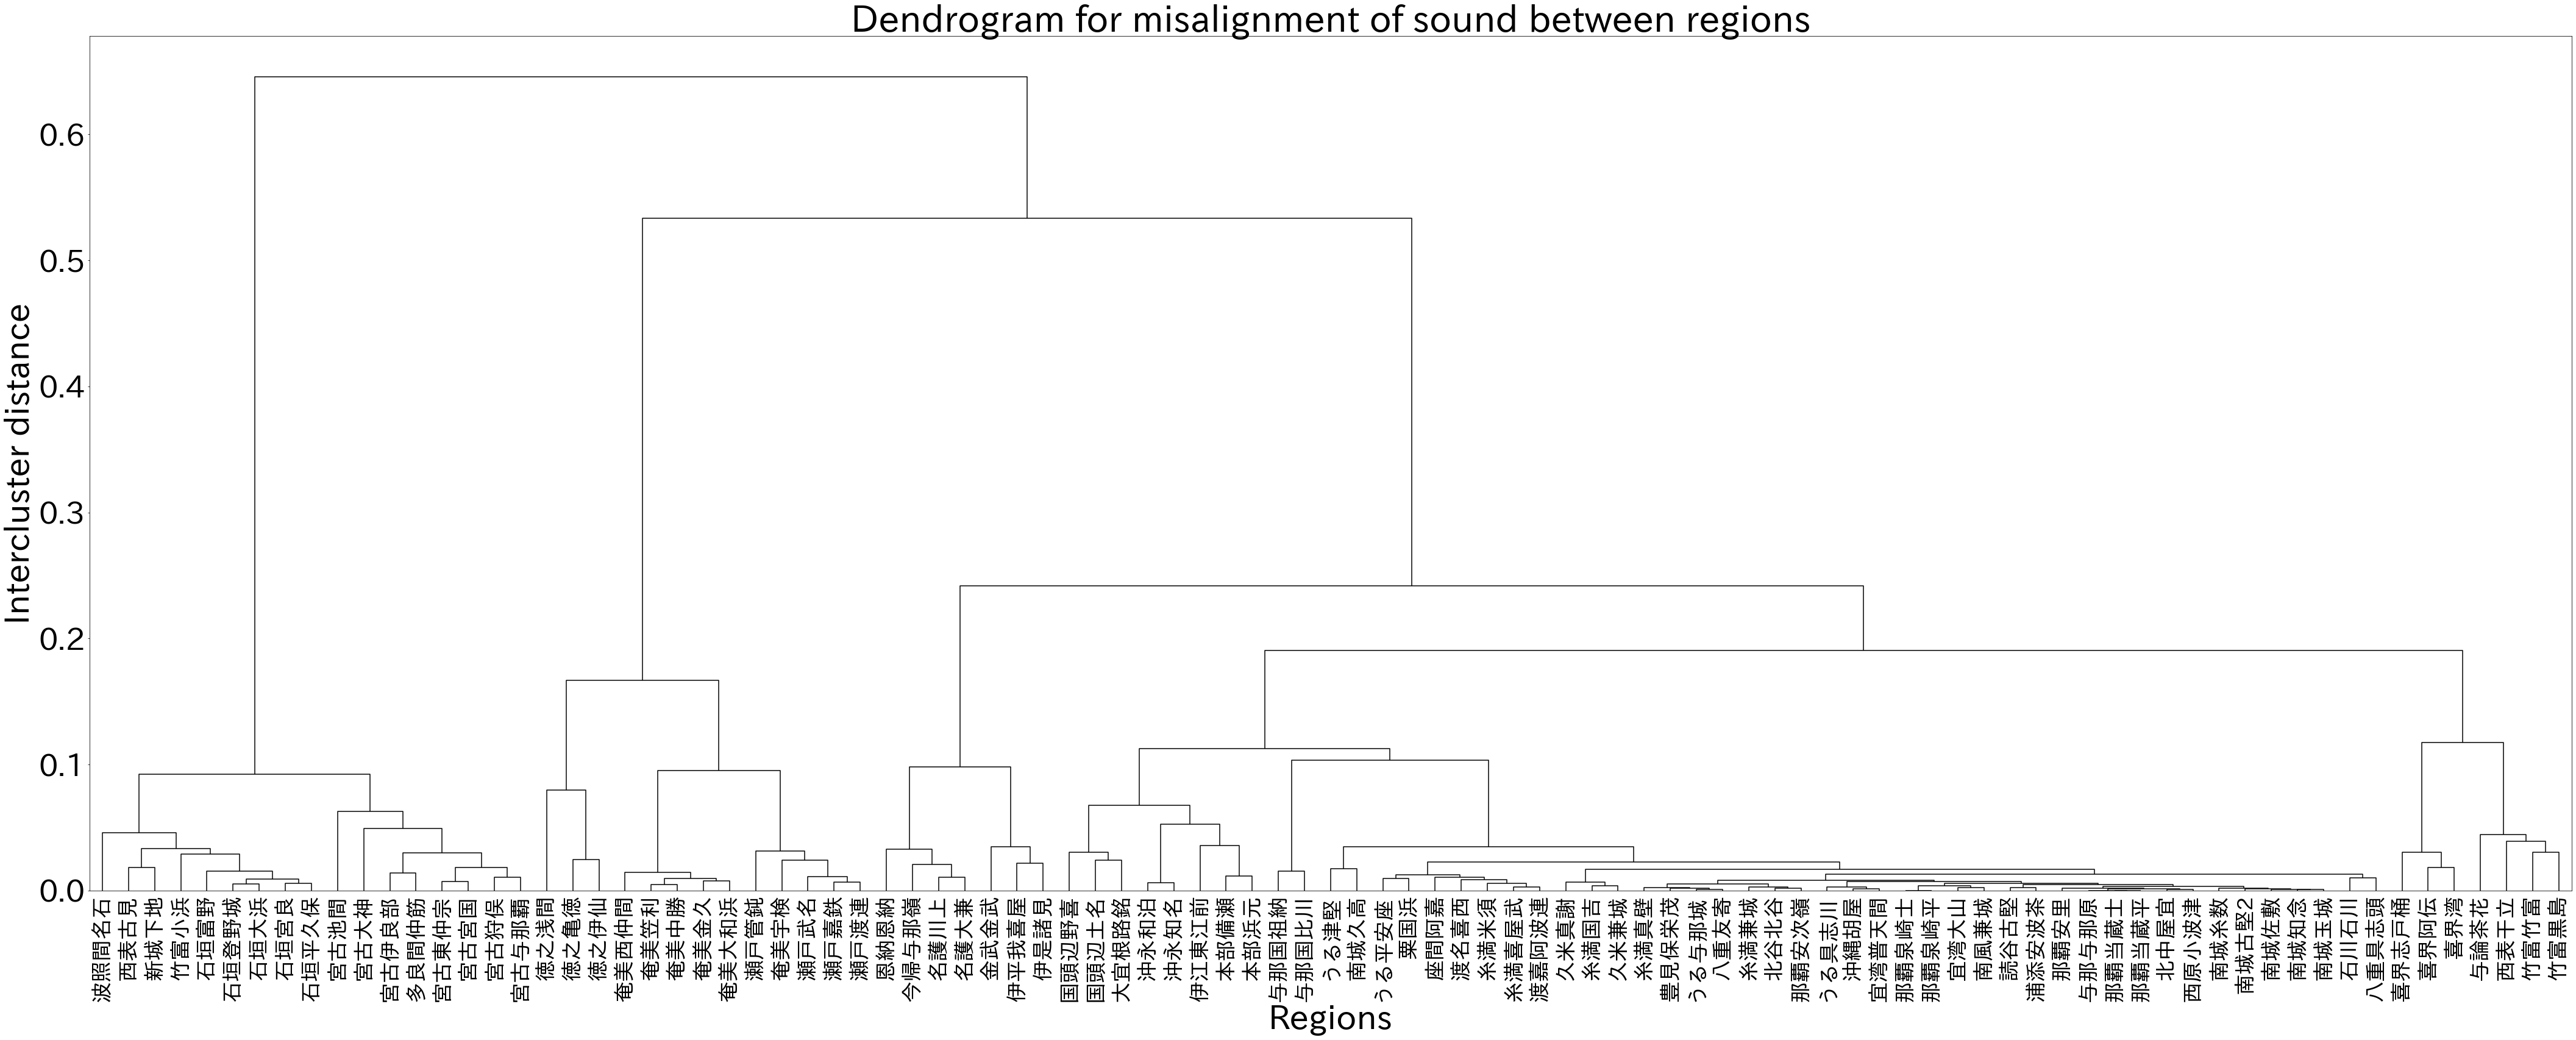

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 3, 3]


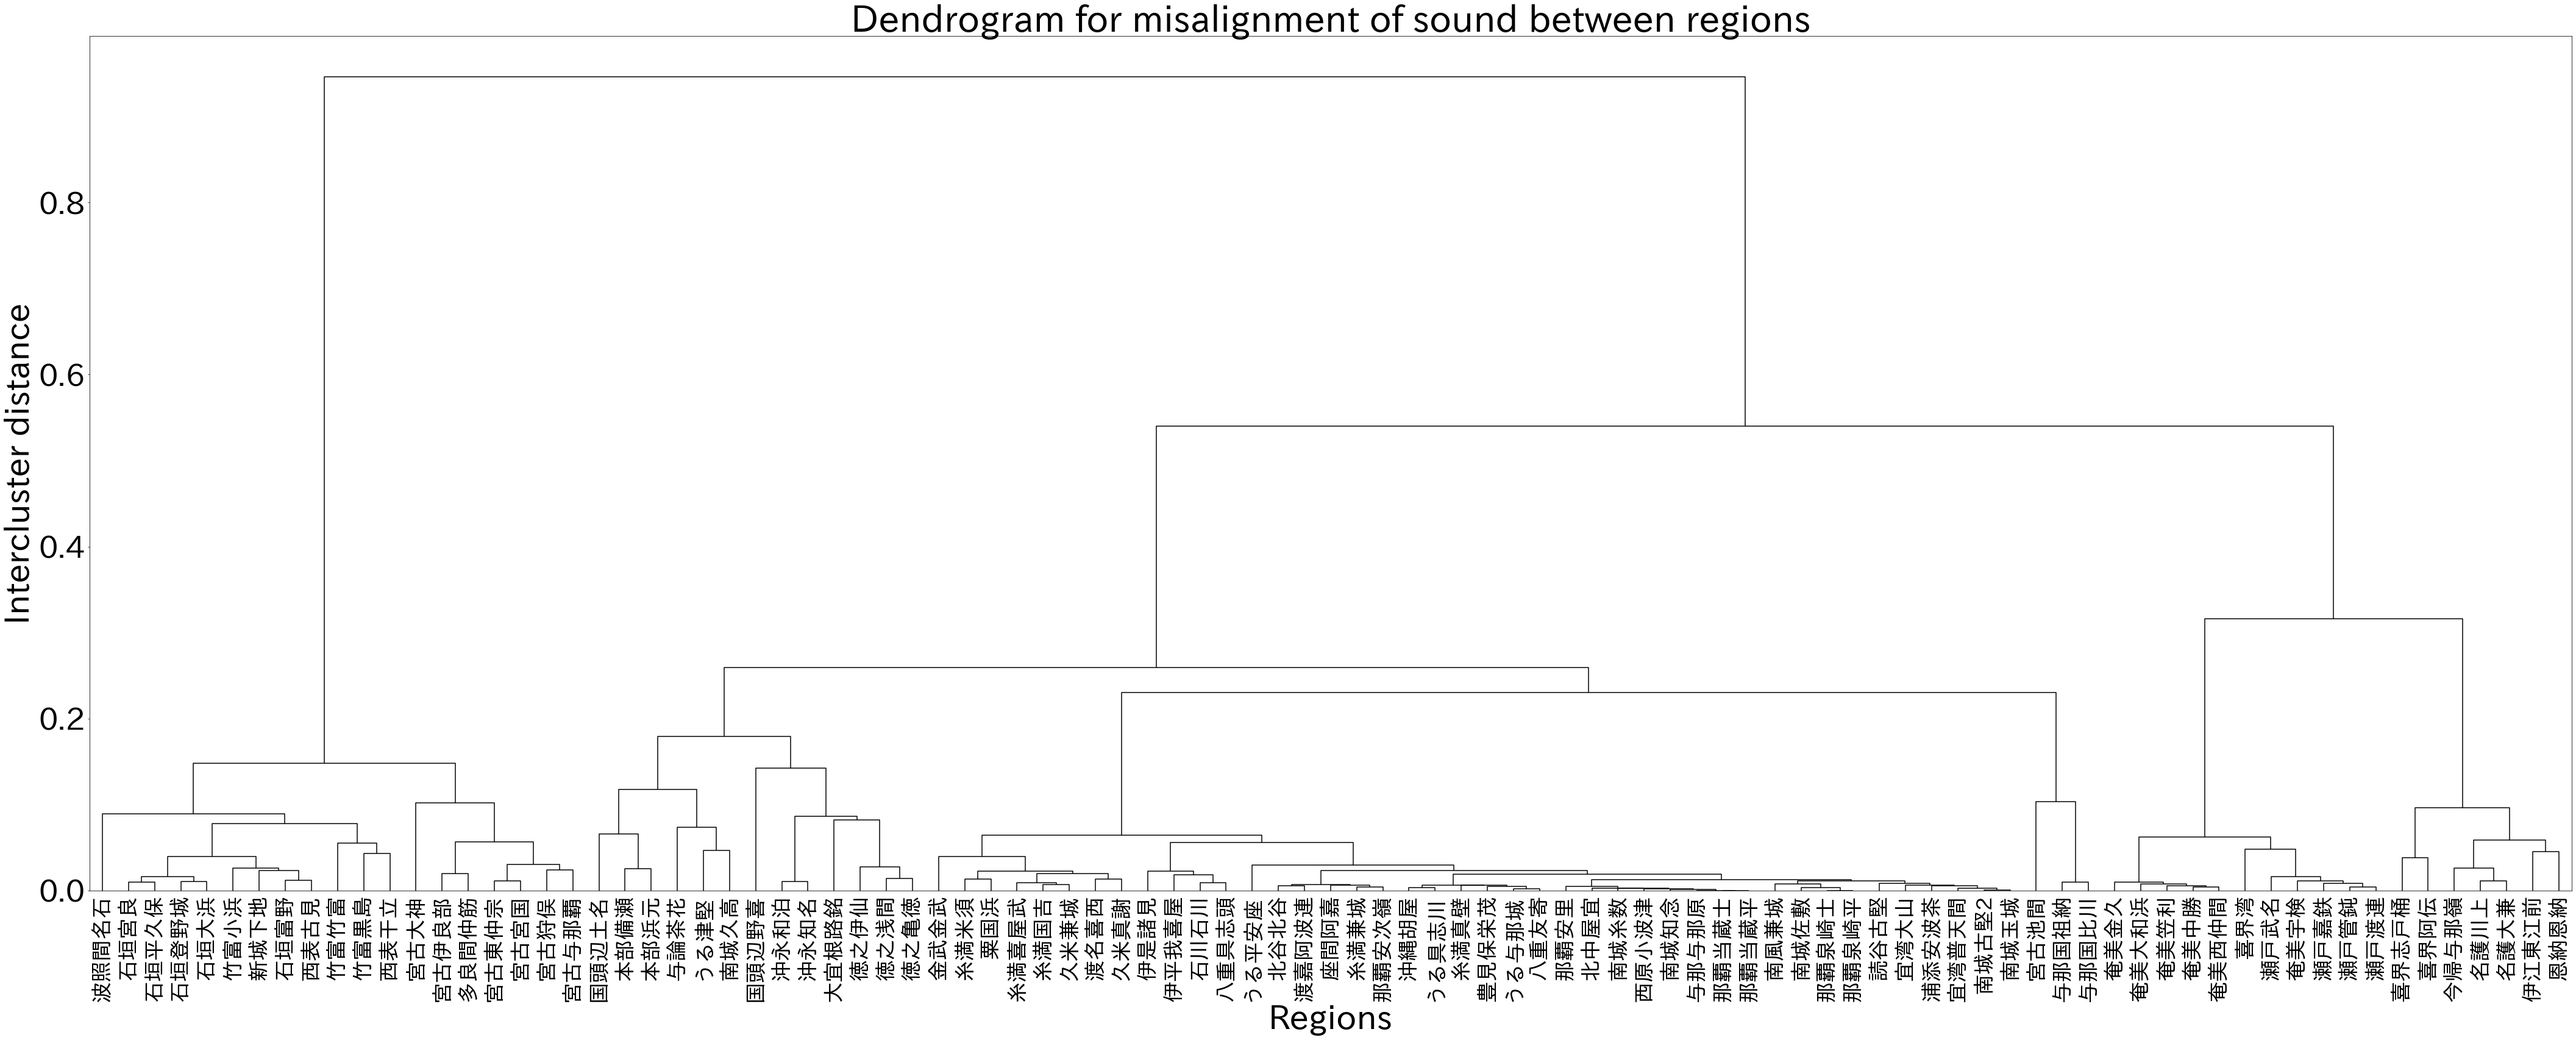

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4]


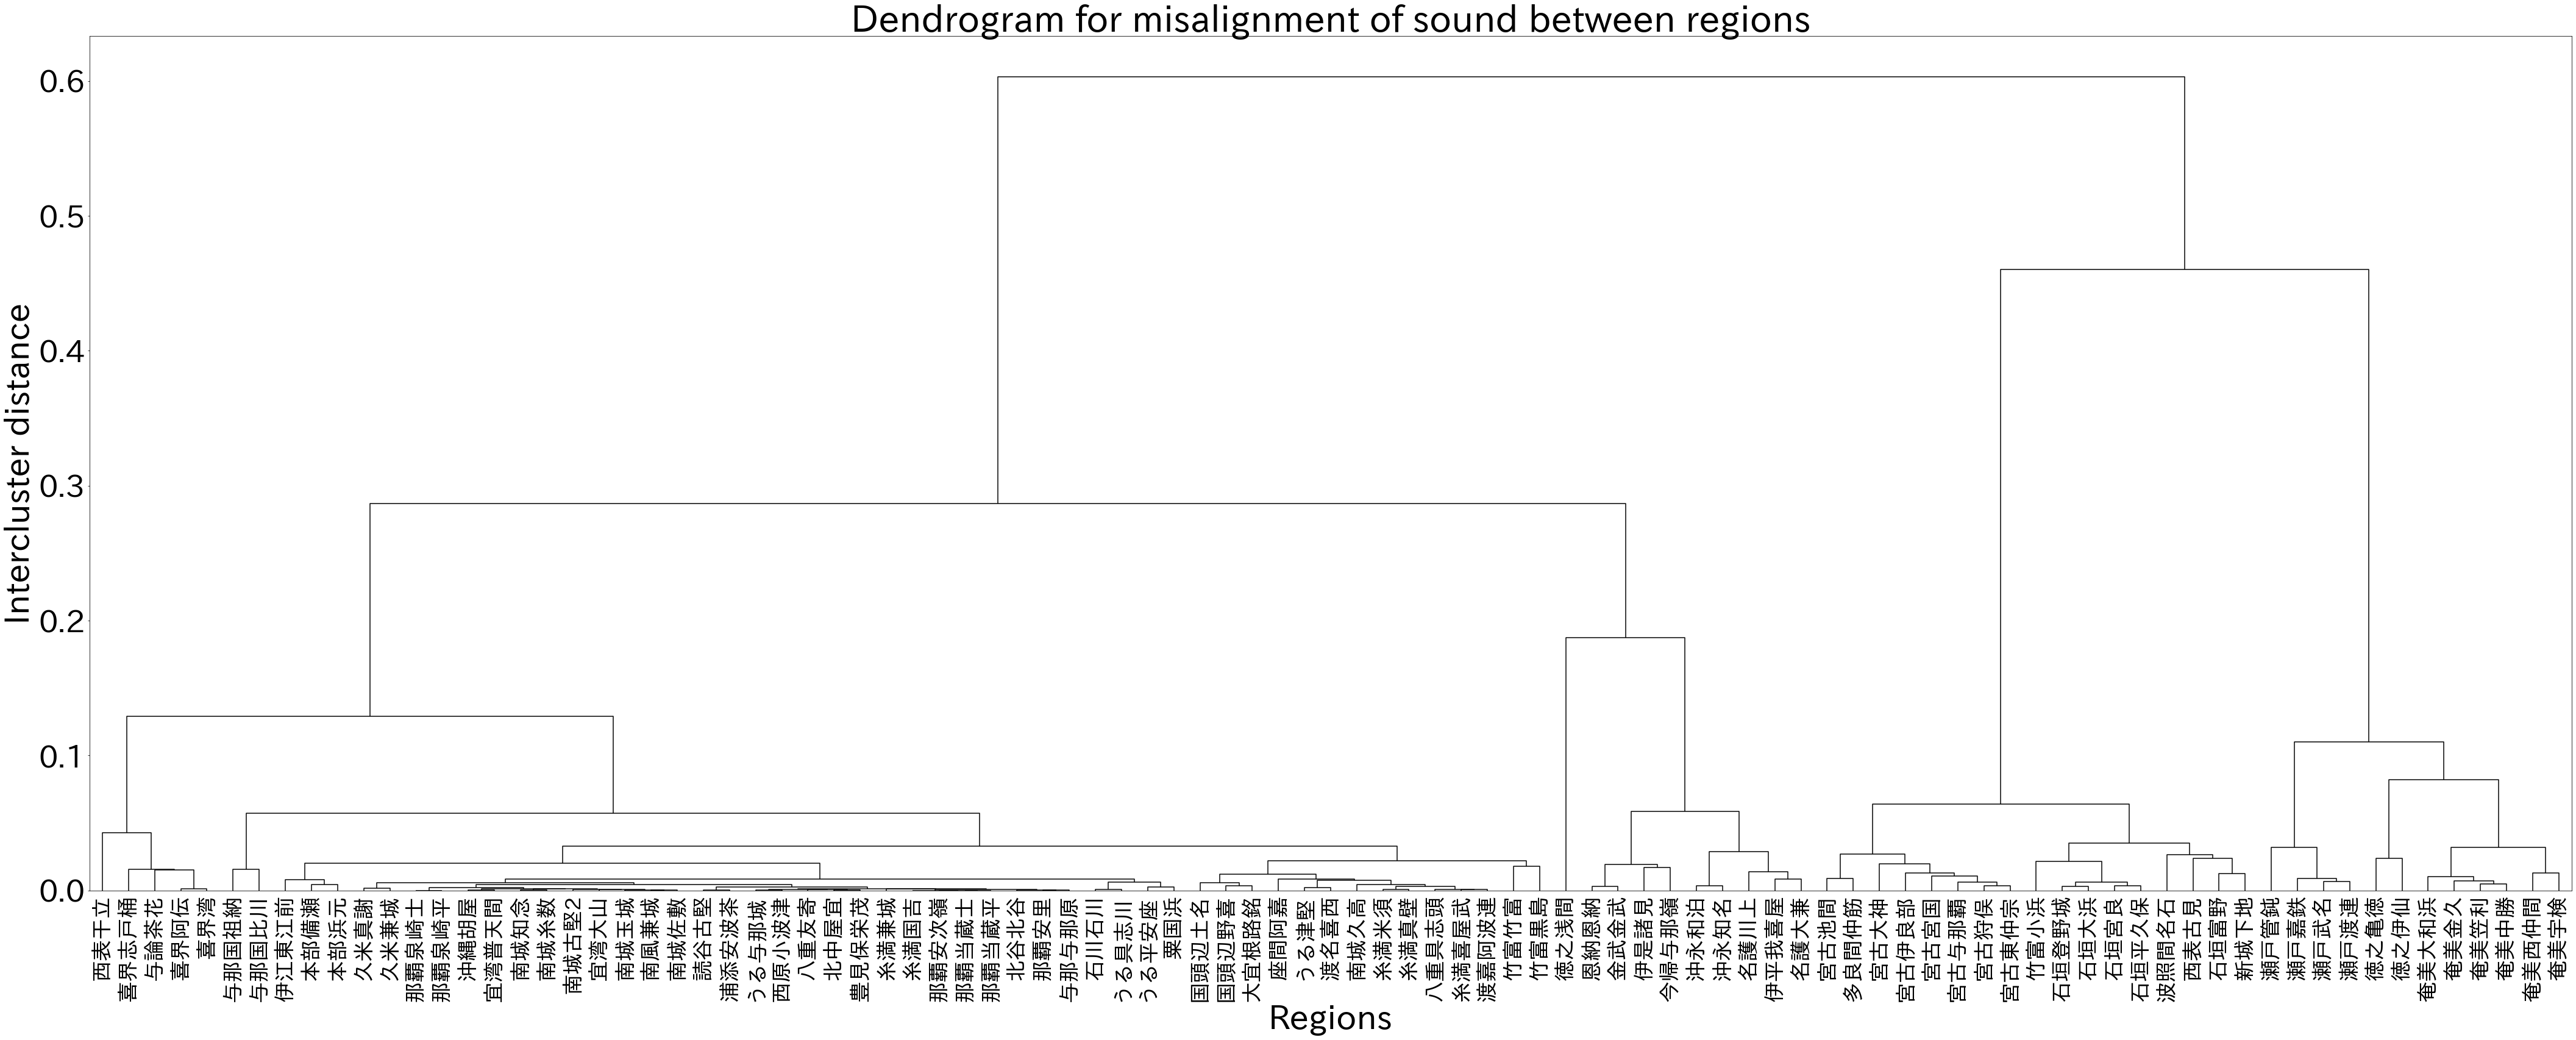

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 1, 5, 5, 4, 4]


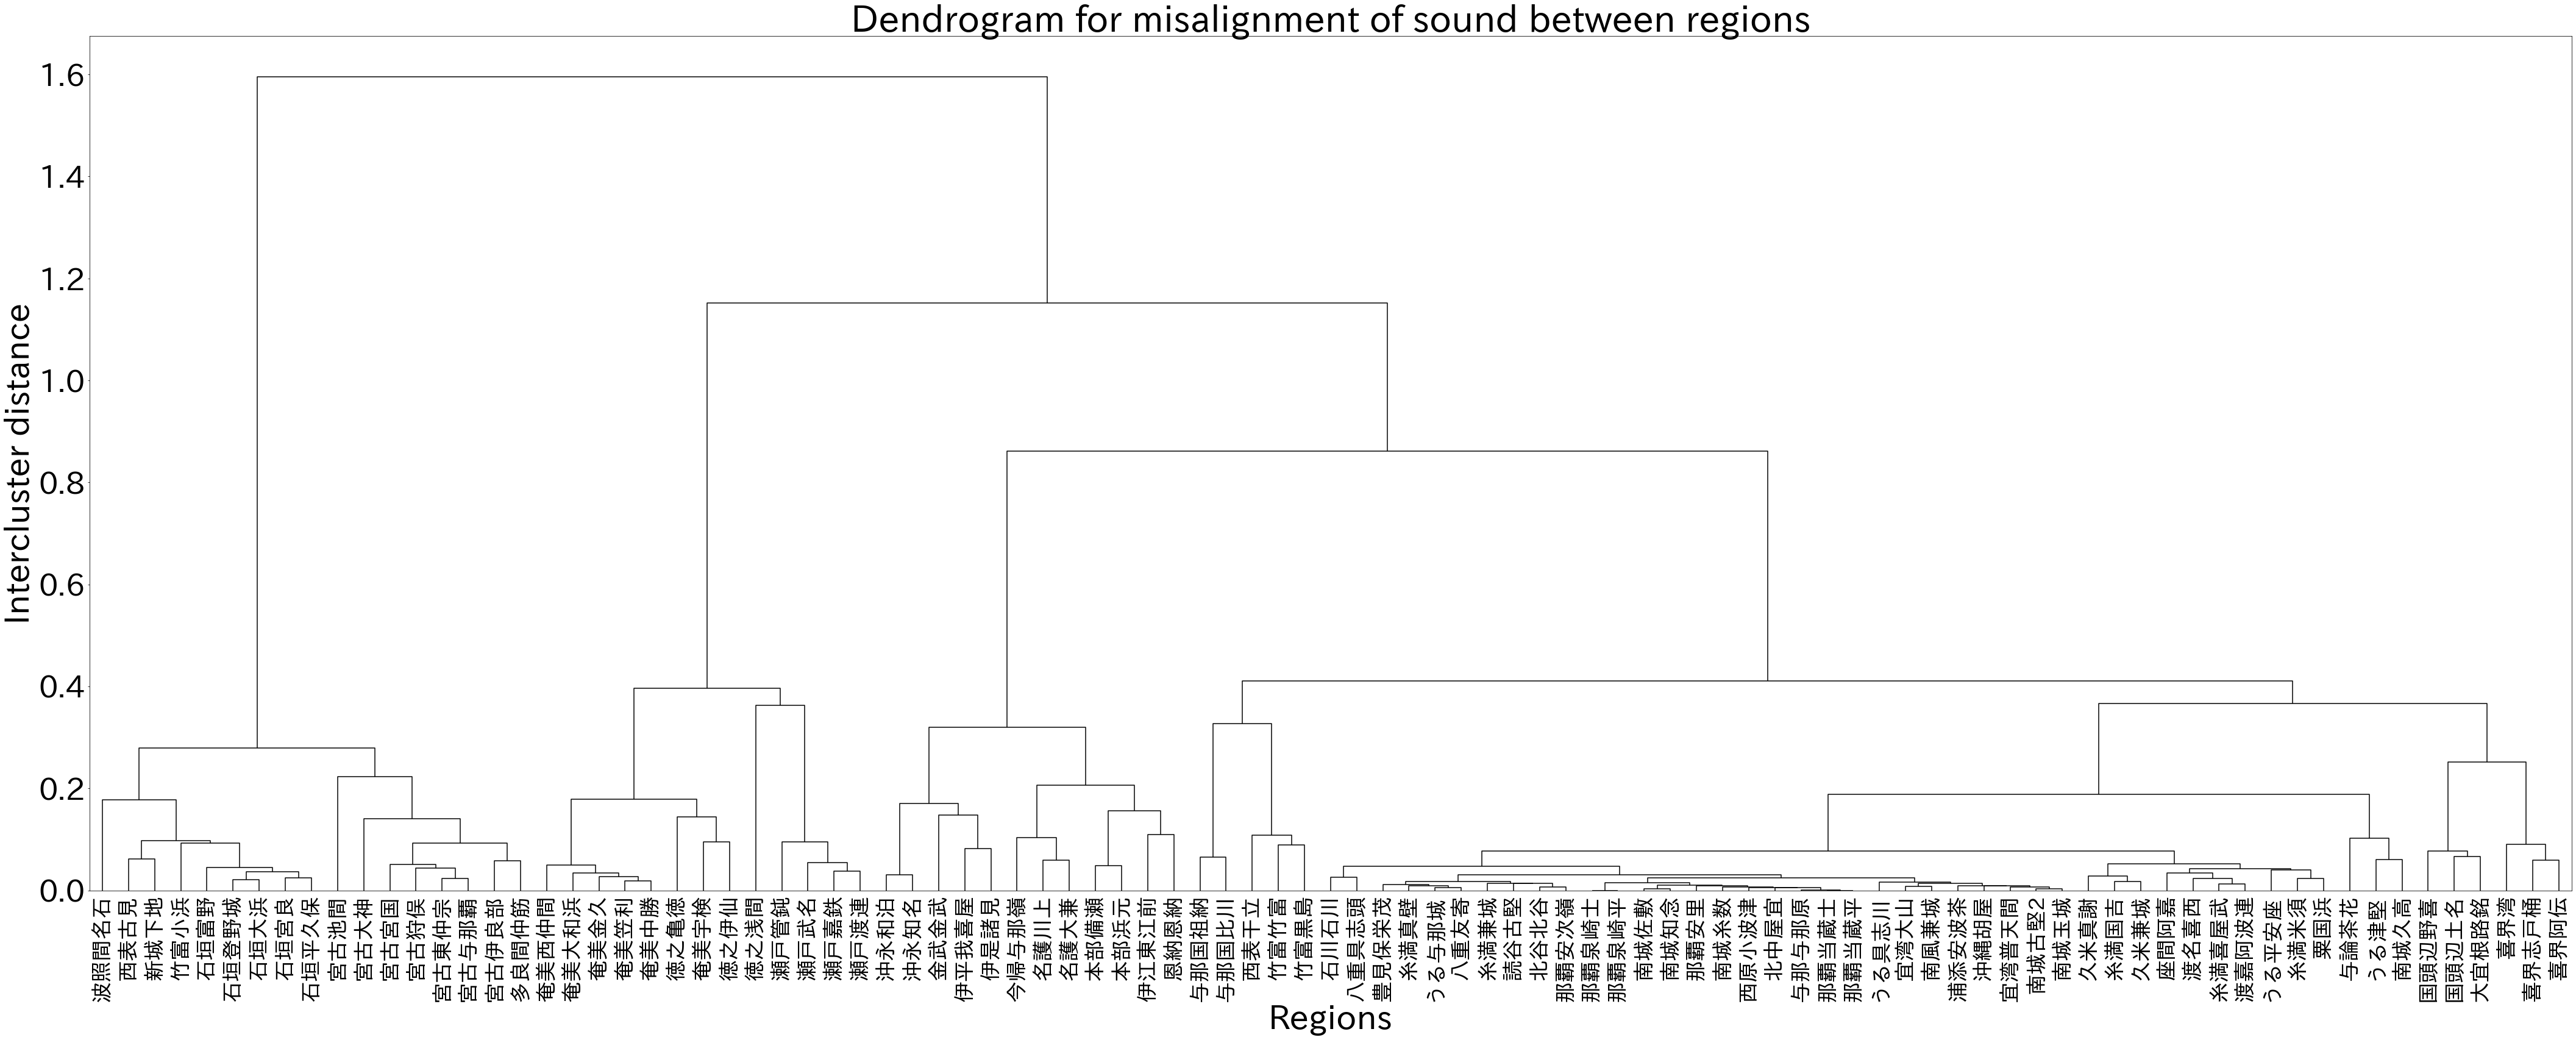

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5]


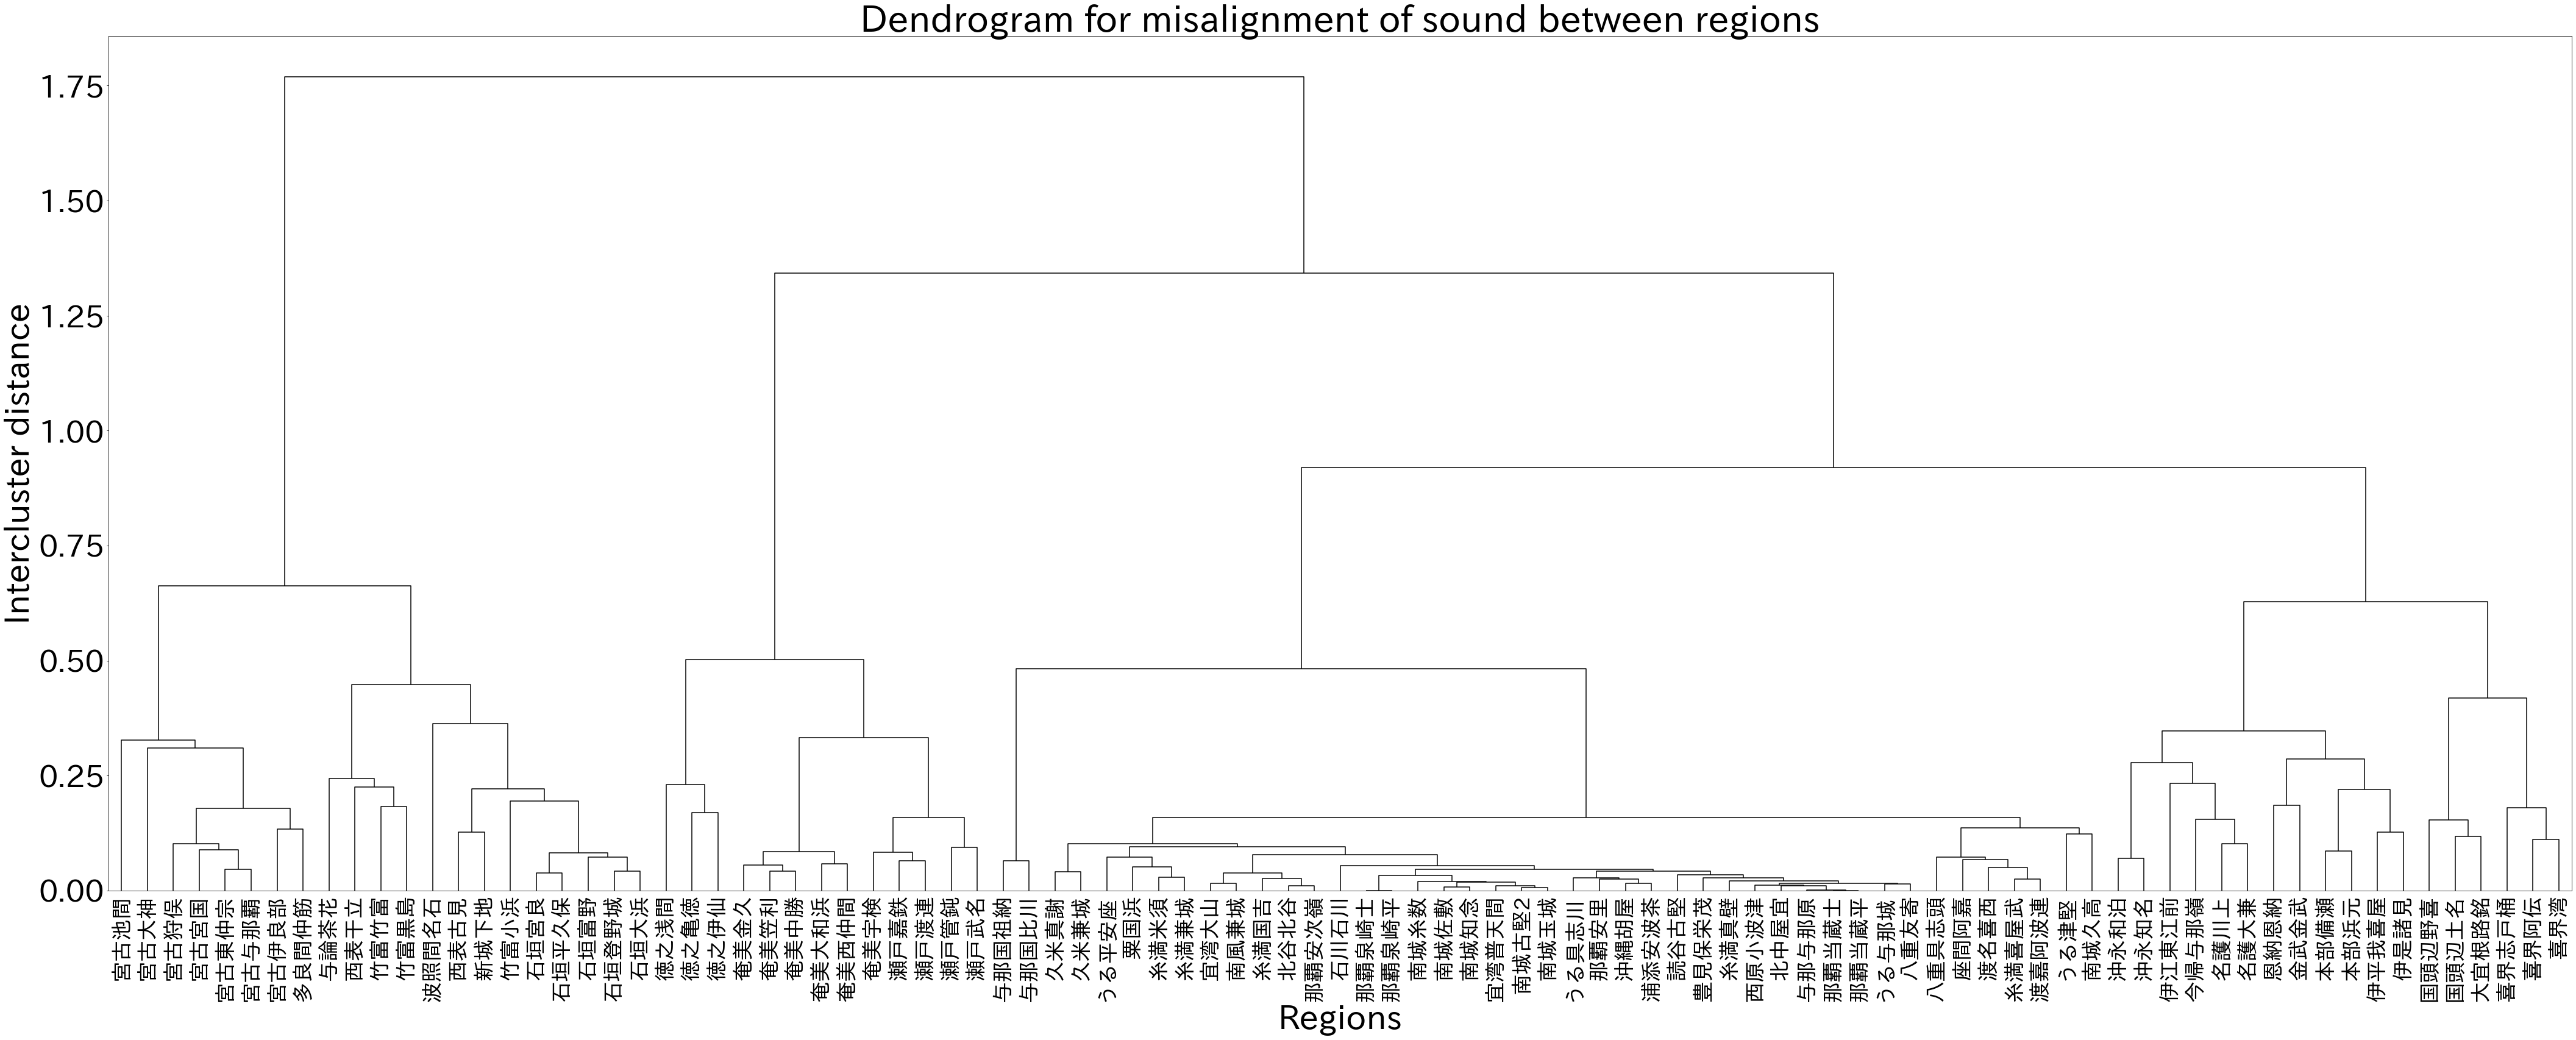

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4]


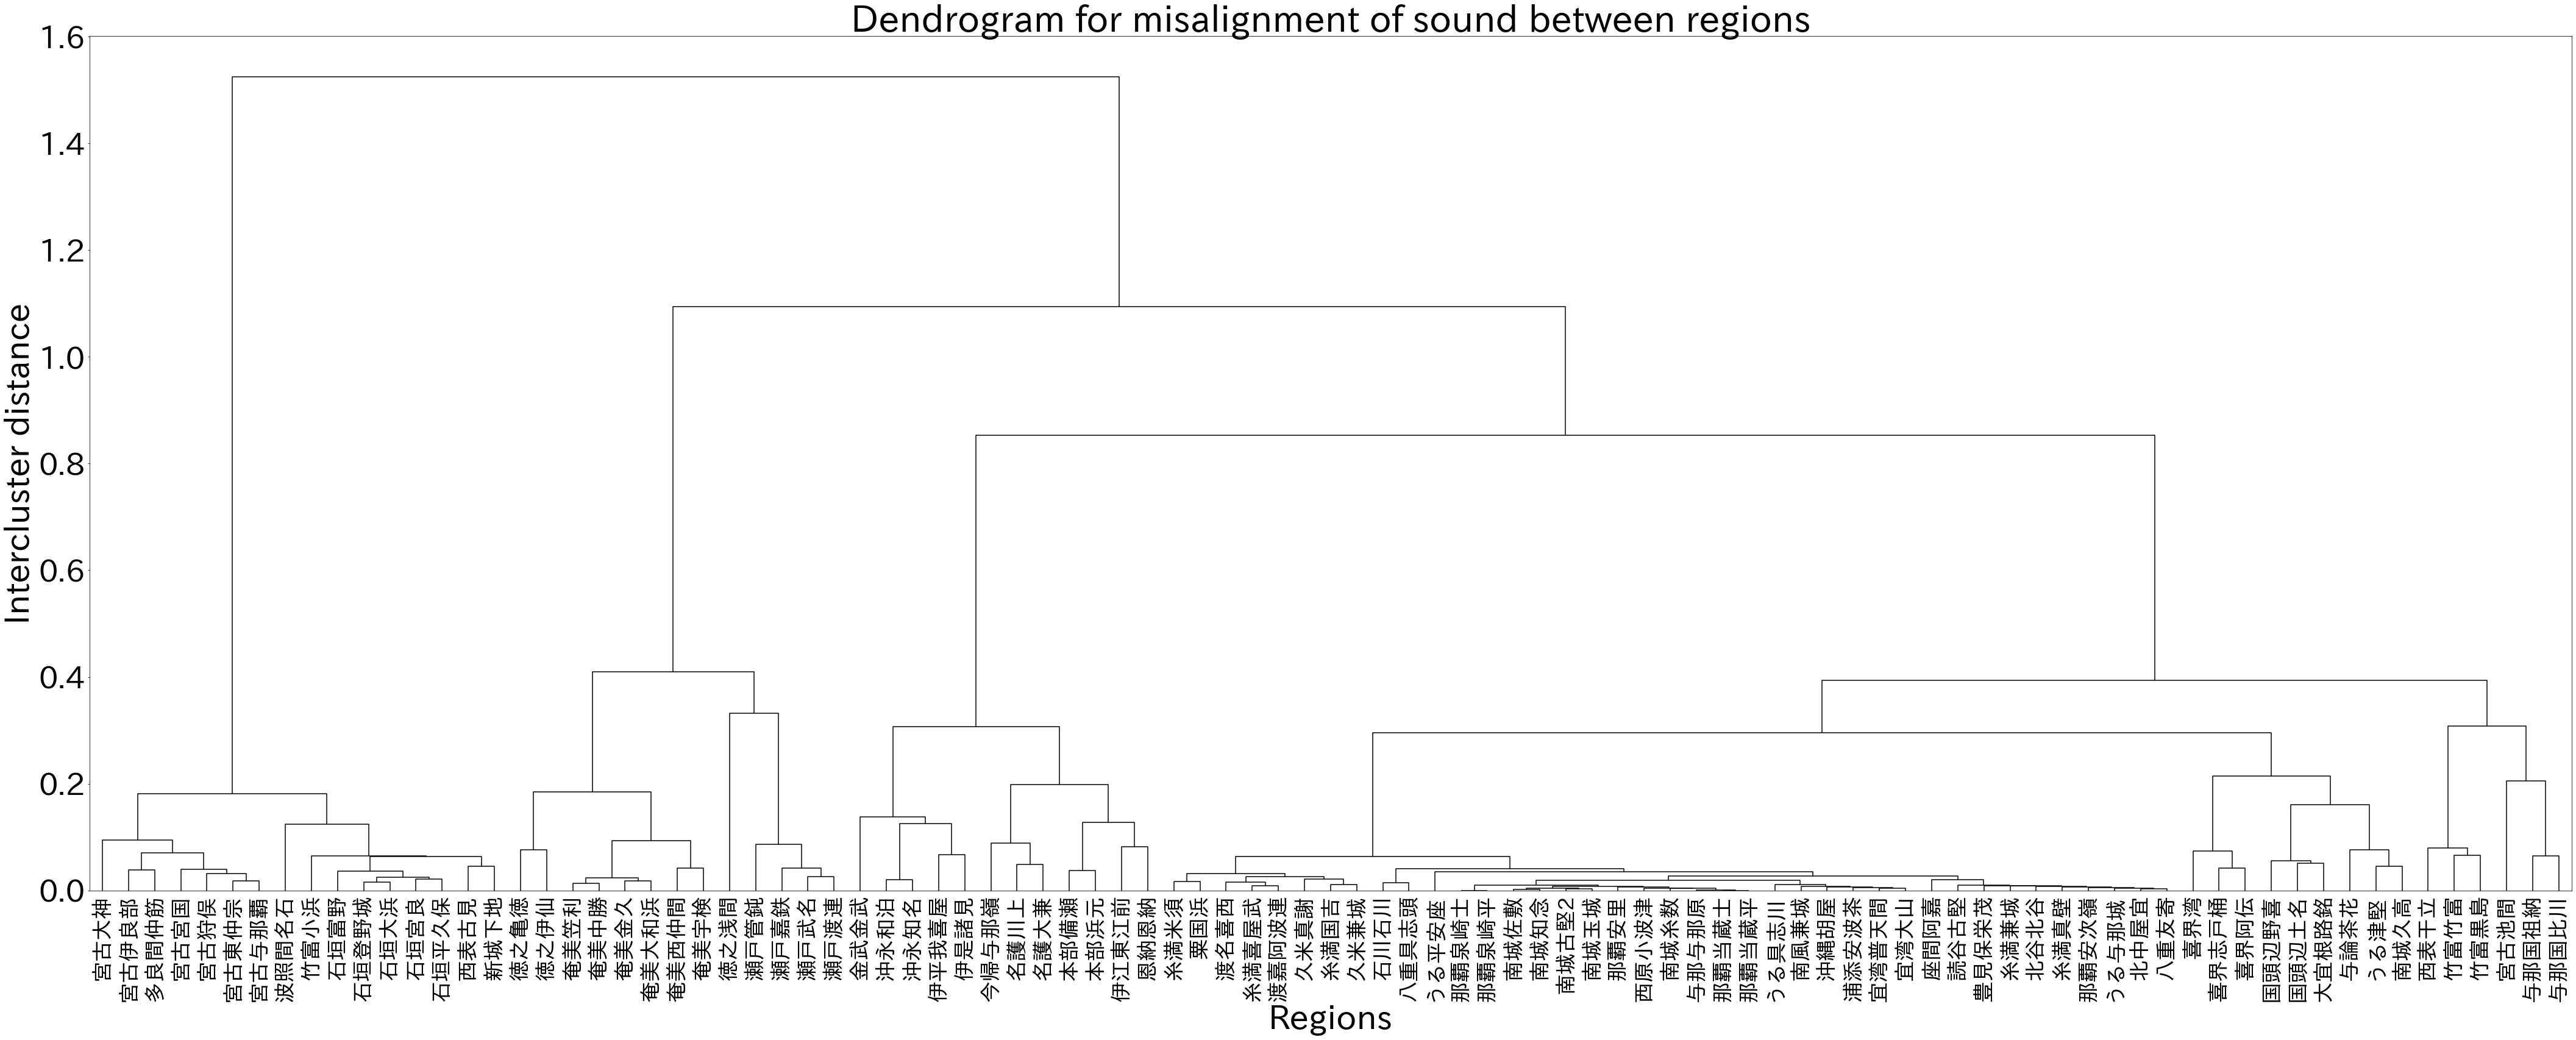

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4]


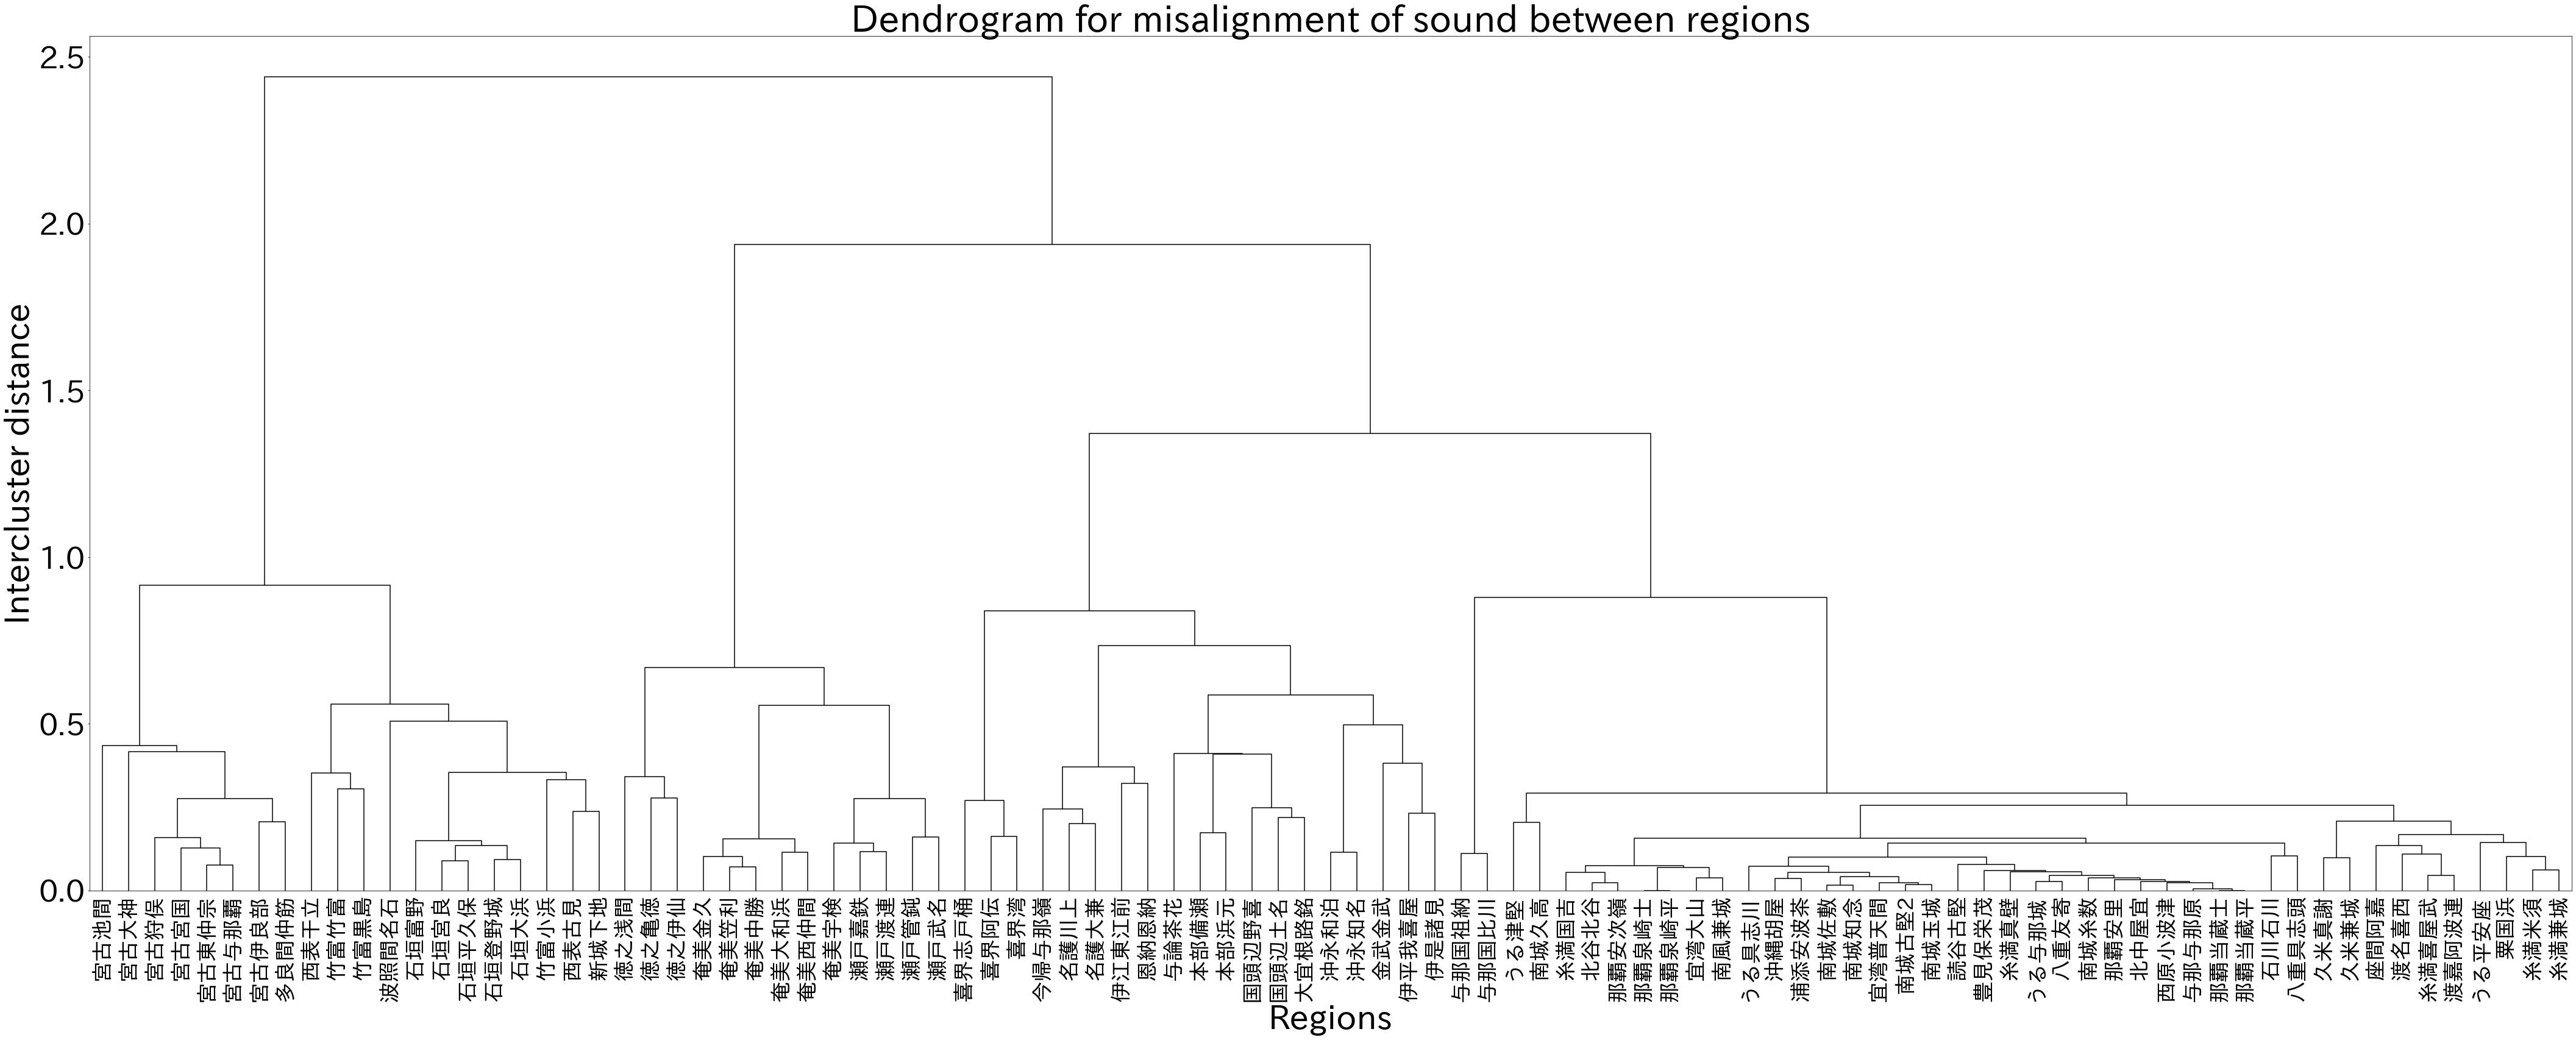

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


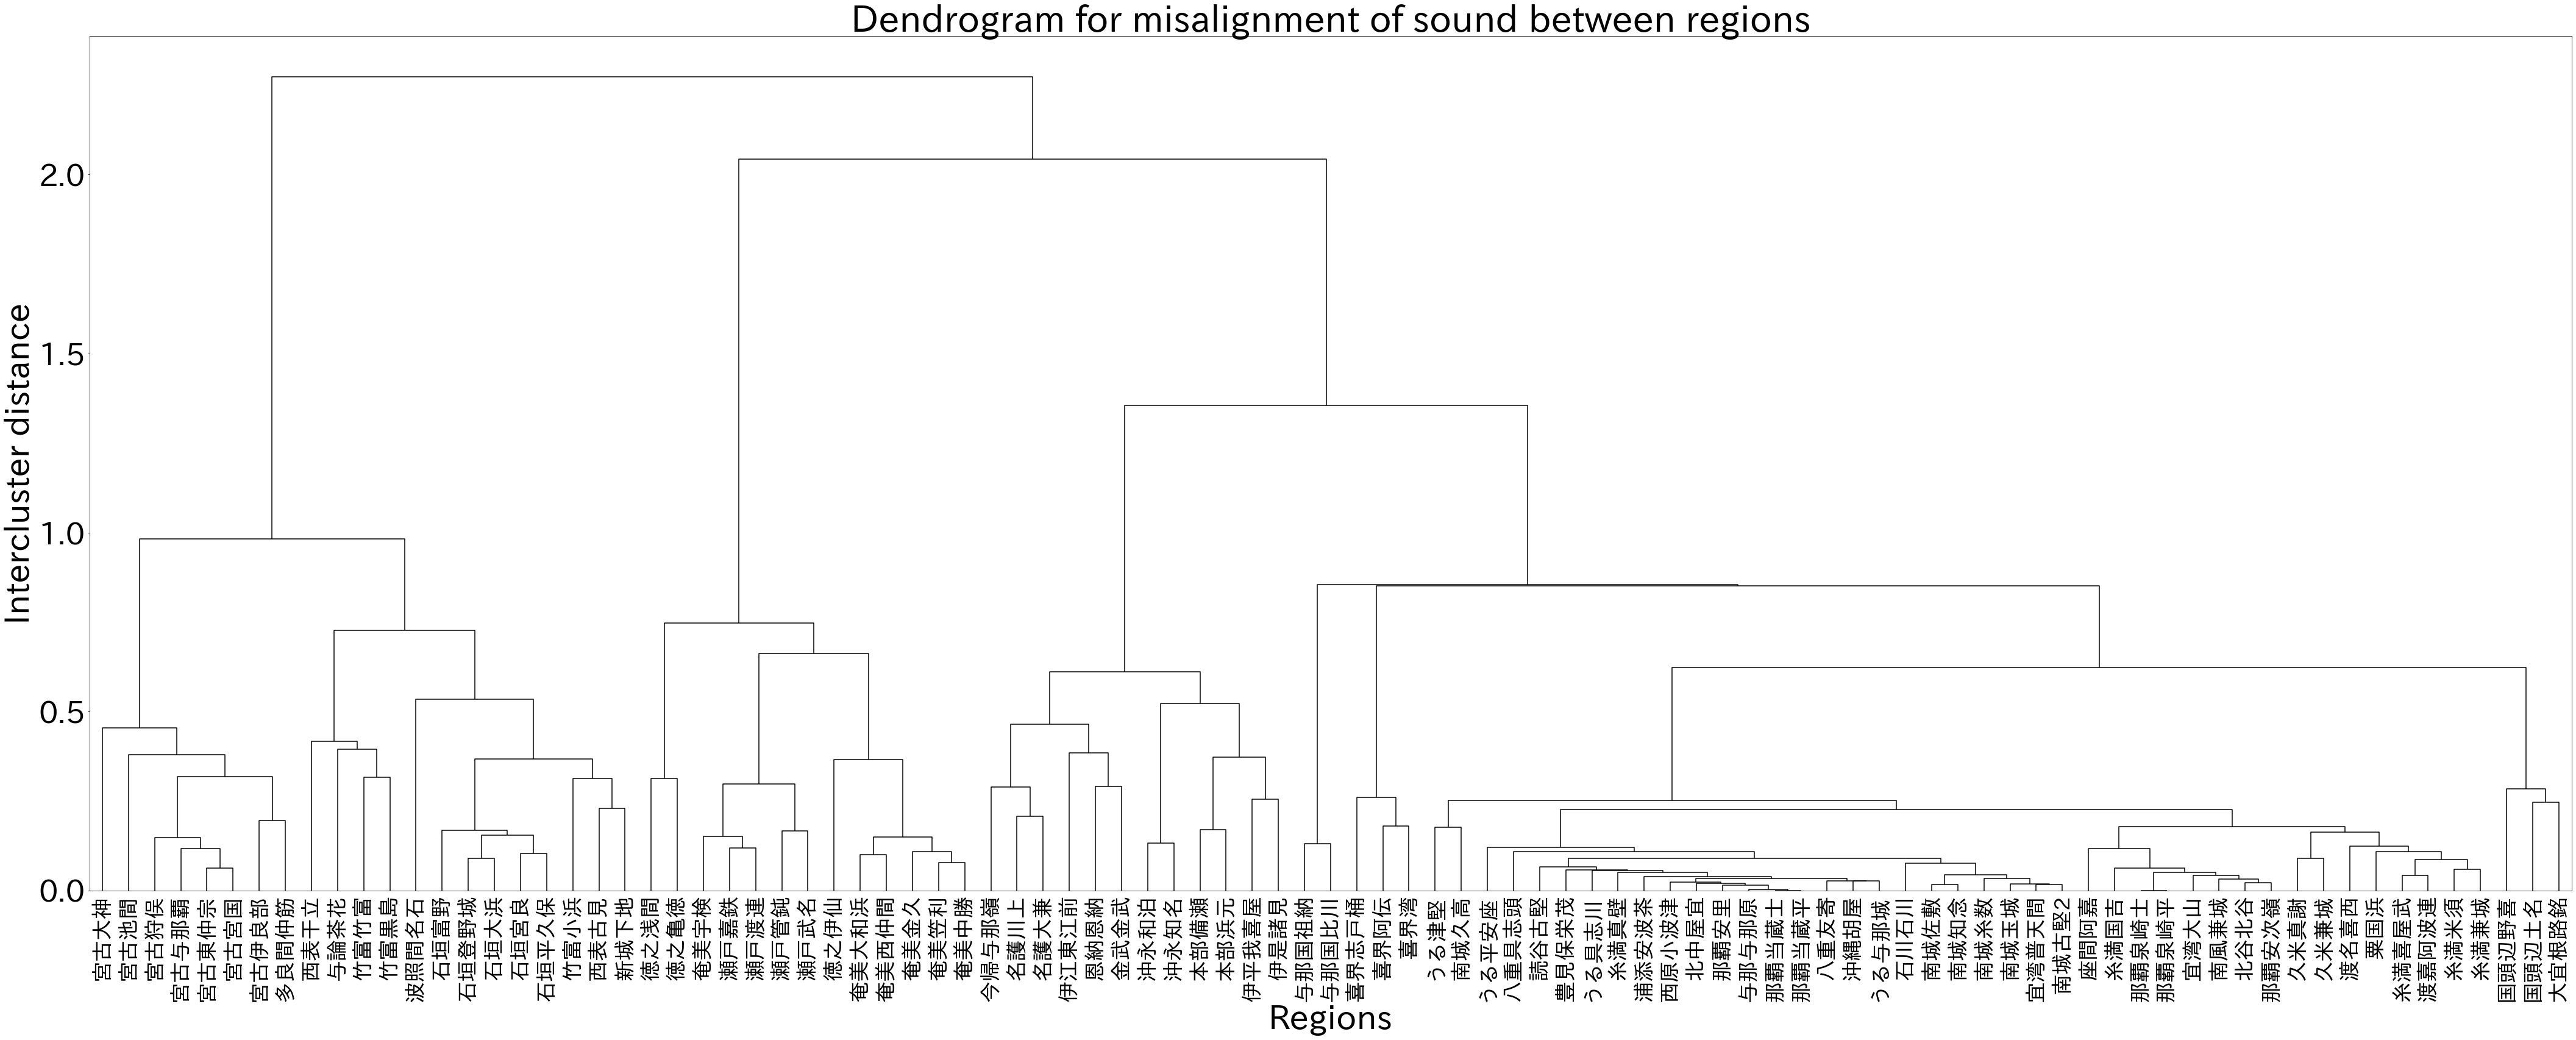

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5]


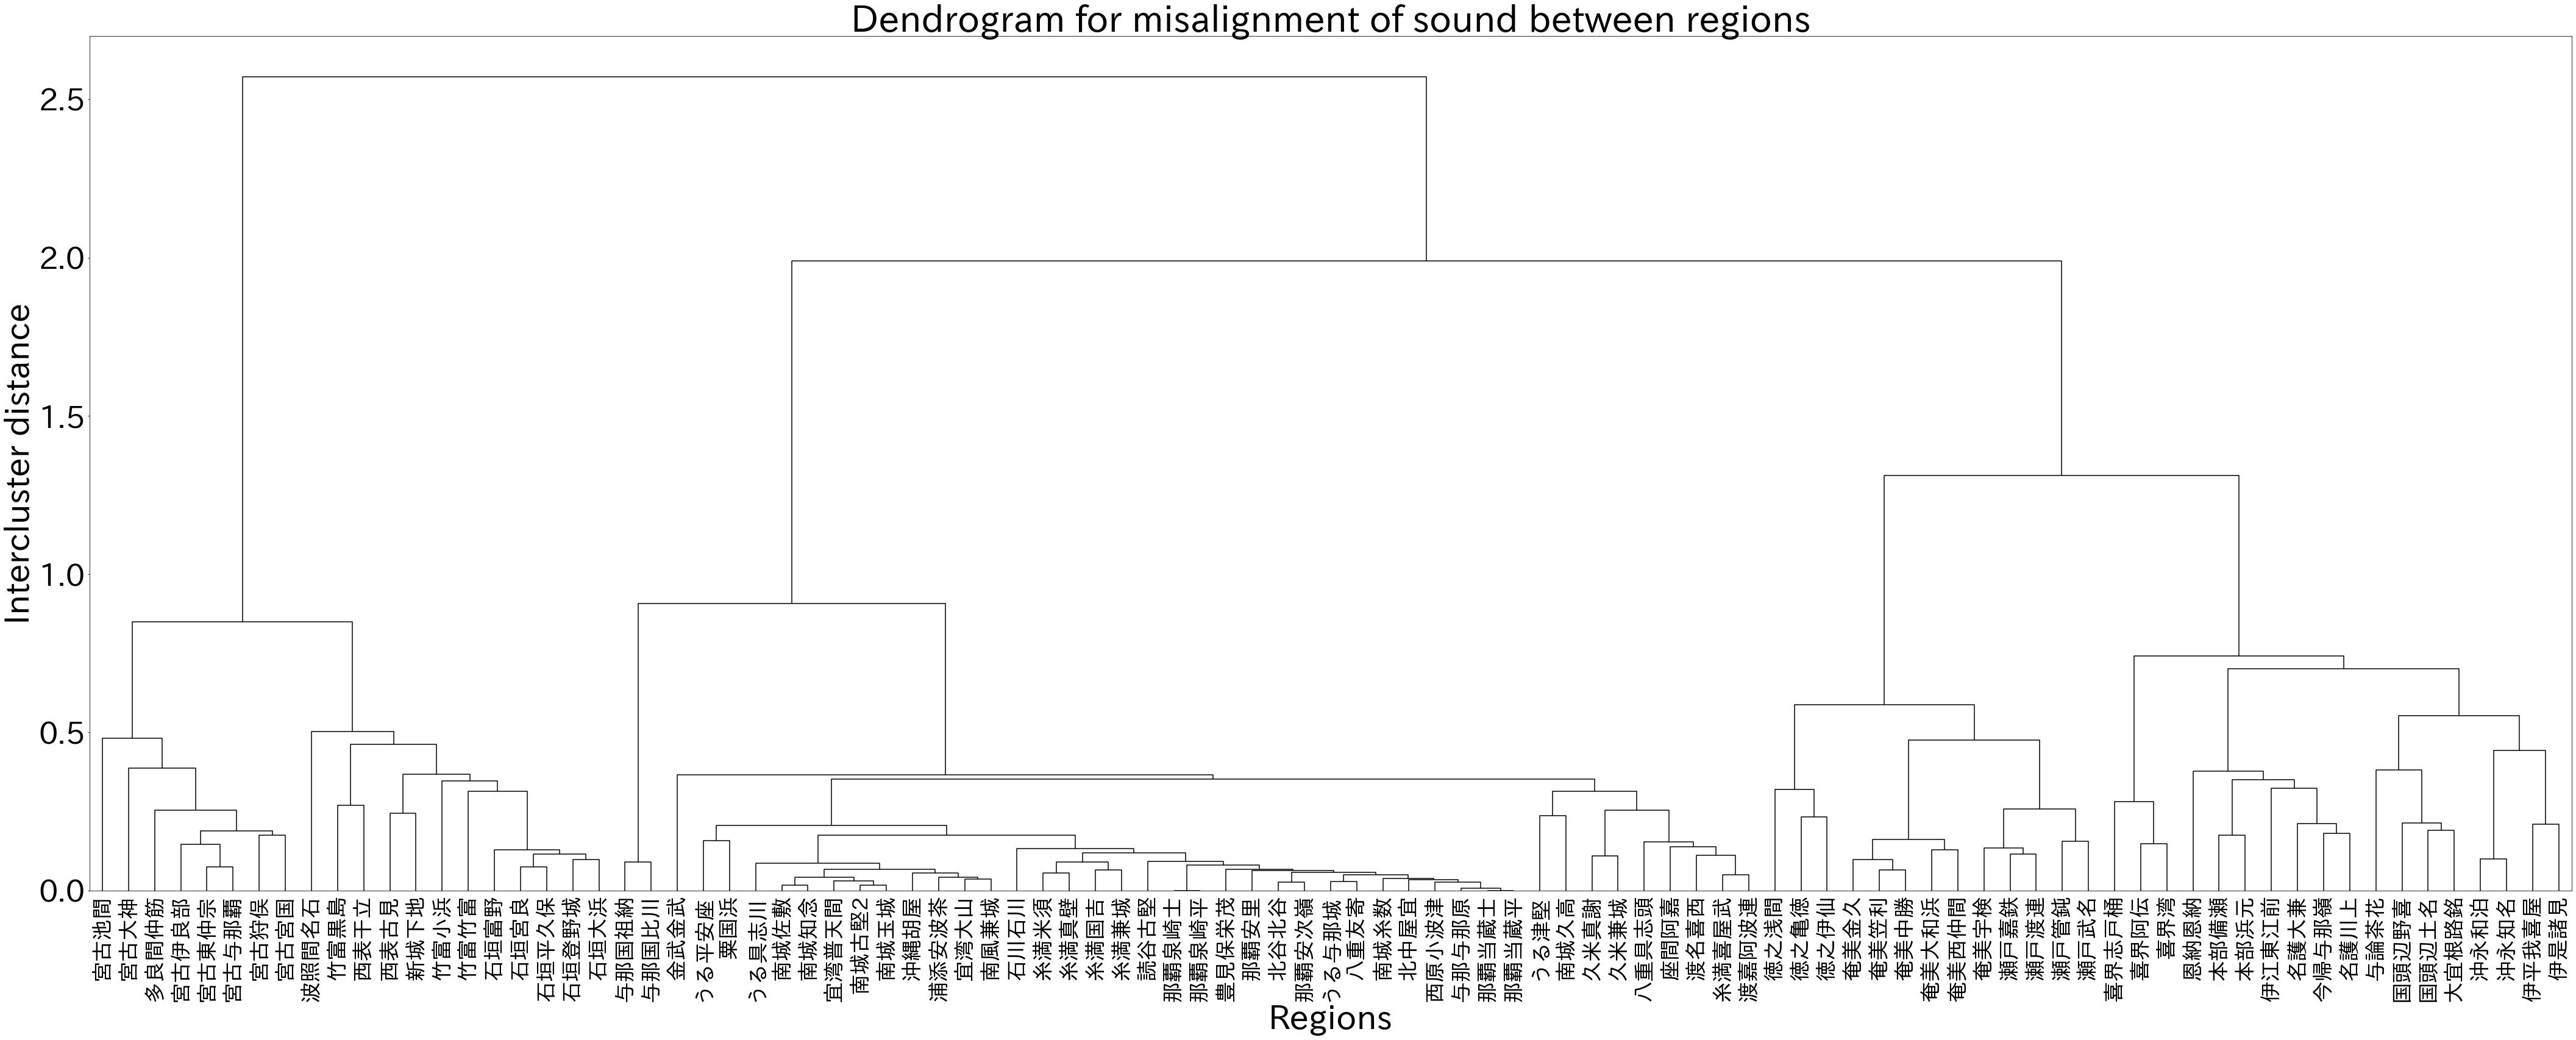

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [3]:
for dORe in range(2):
    if dORe==0:
        dORe="E"
        pattern="counter"
    elif dORe==1:
        dORe="D"
        pattern="pattern"
    for gnumber in range(1,3+1):
        for porder in range(3):
            if porder==0:
                porder="all"
                porder2="A"
            elif porder==1:
                porder="cvc"
                porder2="C"
            elif porder==2:
                porder="vcv"
                porder2="V"
            rflocate = basepath.format("parameter/locations.xlsx")
            rfword   = basepath.format("parameter/sheetlist.xlsx")
            rfpattern= basepath.format("gram{}/{}/{}.xlsx").format(gnumber,pattern,porder)
            picpath=basepath.format("/pic/{}")

            locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
            wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

            symbols=list(locateDf.iloc[:,0])
            locates = list(locateDf.iloc[:,2])
            hyouzi = list(locateDf.iloc[:,1])
            words   = list(wordDf.iloc[:,0])

            ptDf=pd.read_excel(rfpattern, sheet_name=0, header=0, index_col=0)

            len(ptDf.index.str.contains('-9'))

            nonind=ptDf.index.str.contains('-9')
            ptDf=ptDf.loc[~nonind,:]
            ptDf=ptDf.T
            distanceMatrix=np.array(ptDf.values)

            #図の生成
            figtitle='Dendrogram for misalignment of sound between regions'
            himethod='ward'
            # savefile=basepath.format("gramTri/pic/dendAD.png")
            pdis=dist.pdist(distanceMatrix,'cosine')
            z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

            plt.figure(figsize=(60,25))
            plt.rcParams['font.family'] = 'IPAexGothic'
            plt.rcParams['font.size'] = 50
            plt.title(figtitle, fontsize=60)
            plt.xlabel('Regions', fontsize=55)
            plt.ylabel('Intercluster distance', fontsize=55)
            # hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
            hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                                    color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                                    above_threshold_color='black',
                                    labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
            plt.tight_layout()
            # plt.savefig(savefile)
            plt.show()
            plt.close()

            # 指定したクラスタ数でクラスタを得る関数を作る。
            def get_cluster_by_number(result, number):
                output_clusters = []
                x_result, y_result = result.shape
                n_clusters = x_result + 1
                cluster_id = x_result + 1
                father_of = {}
                df1 = pd.DataFrame(result)
                x1 = []
                y1 = []
                x2 = []
                y2 = []
                for i in df1.index:
                    n1 = int(df1.ix[i][0])
                    n2 = int(df1.ix[i][1])
                    val = df1.ix[i][2]
                    n_clusters -= 1
                    if n_clusters >= number:
                        father_of[n1] = cluster_id
                        father_of[n2] = cluster_id

                    cluster_id += 1

                cluster_dict = {}
                for n in range(x_result + 1):
                    if n not in father_of:
                        output_clusters.append([n])
                        continue

                    n2 = n
                    m = False
                    while n2 in father_of:
                        m = father_of[n2]
                        #print [n2, m]
                        n2 = m

                    if m not in cluster_dict:
                        cluster_dict.update({m:[]})
                    cluster_dict[m].append(n)

                output_clusters += cluster_dict.values()

                output_cluster_id = 0
                output_cluster_ids = [0] * (x_result + 1)
                for cluster in sorted(output_clusters):
                    for i in cluster:
                        output_cluster_ids[i] = output_cluster_id
                    output_cluster_id += 1

                return output_cluster_ids

            labels=get_cluster_by_number(z,6)

            print(labels)

            wfile=basepath.format("gram{}/{}/{}Label.xlsx").format(gnumber,pattern,porder)
            with pd.ExcelWriter(wfile, engine='openpyxl') as writer:
                wdf=pd.DataFrame(labels)
                wdf.to_excel(writer,sheet_name="ラベル") #シート名[地点名]